## Telecom Churn Casestudy

### Importing required libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 500)

In [2]:
#ignoring warnings

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [3]:
df_original = pd.read_csv(r'F:\Upgrad Notes\Machine Learning 2\Telecom Churn Case Study\telecom_churn_data.csv')

In [4]:
df= df_original.copy()

In [5]:
df.shape

(99999, 226)

- The dataset consists of 99999 rows and 226 columns

In [6]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
df.describe(include= 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [8]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

### Data Cleaning and Feature Engineering: 

In [9]:
#checking if there is null column in dataset

df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [10]:
#calculate % of null values in each columns

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.head(300)

,Total,Percent
count_rech_2g_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_6,74846,74.846748


* There are columns like 'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g' to 'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8', 'vbc_3g_9' respectively. 

In [11]:
#Rename Columns

df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [12]:
columns_list = list(df.columns)
columns_list

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [13]:
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,

In [14]:
#number of unique values in each column

for i in columns_list:
    print(i)
    print('-'*30)
    print('Total Number of distinct values')
    print(len(df[i].value_counts()))
    print('-*'*30)
    print('Values of distinct values')
    print(df[i].value_counts())
    print('#'*120)

mobile_number
------------------------------
Total Number of distinct values
99999
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
7002374769    1
7001115332    1
7000945323    1
7001852588    1
7000146605    1
             ..
7001315706    1
7000616311    1
7000389462    1
7001775481    1
7000817664    1
Name: mobile_number, Length: 99999, dtype: int64
########################################################################################################################
circle_id
------------------------------
Total Number of distinct values
1
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
109    99999
Name: circle_id, dtype: int64
########################################################################################################################
loc_og_t2o_mou
------------------------------
Total Number of distinct values
1
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinc

12949
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00       16320
0.68         108
1.01         107
0.28         104
0.36         102
           ...  
14.05          1
1020.94        1
885.98         1
445.01         1
253.41         1
Name: loc_og_t2t_mou_9, Length: 12949, dtype: int64
########################################################################################################################
loc_og_t2m_mou_6
------------------------------
Total Number of distinct values
20905
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00      9366
1.01        53
0.48        53
0.56        52
0.23        50
          ... 
213.09       1
815.44       1
217.83       1
181.34       1
173.49       1
Name: loc_og_t2m_mou_6, Length: 20905, dtype: int64
########################################################################################################################
loc_og_t2m_mou_7
-------------------

0.00       52535
0.36          63
0.33          63
0.31          62
0.61          60
           ...  
82.54          1
1349.34        1
225.36         1
211.18         1
501.64         1
Name: std_og_t2t_mou_7, Length: 18567, dtype: int64
########################################################################################################################
std_og_t2t_mou_8
------------------------------
Total Number of distinct values
18291
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00       52113
0.31          74
0.50          64
0.56          61
0.45          61
           ...  
3877.54        1
90.68          1
1168.71        1
1279.89        1
125.41         1
Name: std_og_t2t_mou_8, Length: 18291, dtype: int64
########################################################################################################################
std_og_t2t_mou_9
------------------------------
Total Number of distinct values
17934
-*-*-*-*-*-*-*-*-*-*-

0.00      90457
0.01         97
0.03         86
1.01         85
0.06         62
          ...  
21.38         1
16.01         1
98.51         1
160.96        1
13.89         1
Name: isd_og_mou_8, Length: 1276, dtype: int64
########################################################################################################################
isd_og_mou_9
------------------------------
Total Number of distinct values
1255
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00      87950
0.01         99
1.01         98
0.03         75
0.05         68
          ...  
101.78        1
6.68          1
15.44         1
6.58          1
7.90          1
Name: isd_og_mou_9, Length: 1255, dtype: int64
########################################################################################################################
spl_og_mou_6
------------------------------
Total Number of distinct values
3965
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Va

21918
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00      5673
2.36        39
0.76        38
0.93        37
0.21        36
          ... 
678.36       1
95.36        1
334.66       1
268.96       1
241.34       1
Name: loc_ic_t2m_mou_7, Length: 21918, dtype: int64
########################################################################################################################
loc_ic_t2m_mou_8
------------------------------
Total Number of distinct values
21886
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00       5459
0.46         38
0.41         37
0.98         35
3.99         33
           ... 
340.53        1
440.44        1
5214.93       1
403.48        1
222.31        1
Name: loc_ic_t2m_mou_8, Length: 21886, dtype: int64
########################################################################################################################
loc_ic_t2m_mou_9
------------------------------

3125
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00     75459
0.31       179
0.43       170
0.33       169
0.20       147
         ...  
41.64        1
75.26        1
20.94        1
29.58        1
23.81        1
Name: std_ic_t2f_mou_6, Length: 3125, dtype: int64
########################################################################################################################
std_ic_t2f_mou_7
------------------------------
Total Number of distinct values
3209
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00     75403
0.33       178
0.31       175
0.48       174
0.25       149
         ...  
29.39        1
54.73        1
70.09        1
75.04        1
74.83        1
Name: std_ic_t2f_mou_7, Length: 3209, dtype: int64
########################################################################################################################
std_ic_t2f_mou_8
------------------------------
Total Number o

5557
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00      76854
0.01        297
0.46        134
0.03        121
0.05        106
          ...  
82.73         1
30.26         1
101.59        1
10.34         1
56.43         1
Name: isd_ic_mou_9, Length: 5557, dtype: int64
########################################################################################################################
ic_others_6
------------------------------
Total Number of distinct values
1817
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00       73919
0.06         798
0.48         759
0.05         718
0.08         691
           ...  
1065.61        1
20.83          1
215.03         1
19.00          1
7.90           1
Name: ic_others_6, Length: 1817, dtype: int64
########################################################################################################################
ic_others_7
------------------------------


Name: last_day_rch_amt_6, dtype: int64
########################################################################################################################
last_day_rch_amt_7
------------------------------
Total Number of distinct values
173
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0       32416
30      10835
110      8614
50       7752
10       5375
20       4873
128      3303
130      3198
120      2078
25       1588
154      1426
250      1230
44       1206
150      1184
252      1017
100      1003
200       960
65        926
36        703
17        691
41        572
27        536
67        489
198       423
23        415
169       405
98        399
33        268
145       265
70        264
152       261
7         244
9         222
37        215
26        215
229       211
86        203
550       202
350       178
14        169
46        156
179       156
48        148
77        147
500       146
398       143
279       136
91       

15114
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00      77474
0.01         94
0.02         79
0.03         47
0.04         44
          ...  
89.96         1
15.61         1
515.44        1
80.18         1
125.41        1
Name: vol_2g_mb_7, Length: 15114, dtype: int64
########################################################################################################################
vol_2g_mb_8
------------------------------
Total Number of distinct values
14994
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0.00      77214
0.01        105
0.02         82
0.03         62
0.05         47
          ...  
129.10        1
613.90        1
706.76        1
24.38         1
772.57        1
Name: vol_2g_mb_8, Length: 14994, dtype: int64
########################################################################################################################
vol_2g_mb_9
------------------------------
Total Nu

25
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0     95818
1      2990
2       607
3       216
4       108
5        65
6        45
7        45
9        24
8        20
11       12
10       12
15        5
12        4
14        4
19        4
13        3
18        3
22        3
23        3
16        2
17        2
29        2
28        1
21        1
Name: sachet_3g_6, dtype: int64
########################################################################################################################
sachet_3g_7
------------------------------
Total Number of distinct values
27
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Values of distinct values
0     95869
1      2810
2       635
3       229
4       129
5       102
6        64
7        34
8        20
9        20
11       14
10       13
12       13
15        7
14        7
13        6
18        5
19        4
17        3
20        3
22        3
16        2
21        2
24        2
33  

In [15]:
#finding date columns

date_columns_list = []
for columns in columns_list:
    if 'date' in columns:
        date_columns_list.append(columns)
date_columns_list

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [16]:
#finding id columns

id_columns = ['mobile_number','circle_id']
id_columns

['mobile_number', 'circle_id']

### Identifying categorical columns and numeric columns

In [17]:
## 0 and 1 columns
categoric_columns =  ['night_pck_user_6',
                      'night_pck_user_7',
                      'night_pck_user_8',
                      'night_pck_user_9',
                      'fb_user_6',
                      'fb_user_7',
                      'fb_user_8',
                      'fb_user_9'
                     ]

In [18]:
numeric_columns = [column for column in df.columns if column not in id_columns + date_columns_list + categoric_columns]

In [19]:
len(numeric_columns)

204

### The dataset predominantly consists of numeric columns.
- Numeric columns = 204
- Categoric columns = 8

### Imputing missing values

In [20]:
recharge_columns = []
for columns in df.columns:
    if 'rech' in columns and 'date' not in columns:
        recharge_columns.append(columns)

In [21]:
df[recharge_columns].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [22]:
len(recharge_columns)

32

In [23]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,

In [24]:
# Checking recharge date corrosponding to the other recharge columns to check if all are missing so that we can impute
# Here we have checked for June month

temp_6= df.loc[df.date_of_last_rech_data_6.isnull() & df.total_rech_data_6.isnull() 
               & df.max_rech_data_6.isnull() & df.av_rech_amt_data_6.isnull(),
       ["date_of_last_rech_data_6", "total_rech_data_6",
        "max_rech_data_6", "av_rech_amt_data_6"]]
temp_6

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
...,...,...,...,...
99991,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN


In [25]:
temp_6.isnull().sum()

date_of_last_rech_data_6    74846
total_rech_data_6           74846
max_rech_data_6             74846
av_rech_amt_data_6          74846
dtype: int64

In [26]:
# Checking recharge date corrosponding to the other recharge columns to check if all are missing so that we can impute
# Here we have checked for July month

temp_7= df.loc[df.date_of_last_rech_data_7.isnull() & df.total_rech_data_7.isnull() 
               & df.max_rech_data_7.isnull()  & df.av_rech_amt_data_7.isnull(),
       ["date_of_last_rech_data_7", "total_rech_data_7", 
        "max_rech_data_7", "av_rech_amt_data_7"]]
temp_7

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
...,...,...,...,...
99993,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN


In [27]:
temp_7.isnull().sum()

date_of_last_rech_data_7    74428
total_rech_data_7           74428
max_rech_data_7             74428
av_rech_amt_data_7          74428
dtype: int64

In [28]:
# Checking recharge date corrosponding to the other recharge columns to check if all are missing so that we can impute
# Here we have checked for August month

temp_8= df.loc[df.date_of_last_rech_data_8.isnull() & df.total_rech_data_8.isnull() 
               & df.max_rech_data_8.isnull()& df.av_rech_amt_data_8.isnull(),
       ["date_of_last_rech_data_8", "total_rech_data_8", 
        "max_rech_data_8", "av_rech_amt_data_8"]]
temp_8

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
...,...,...,...,...
99993,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN


In [29]:
temp_8.isnull().sum()

date_of_last_rech_data_8    73660
total_rech_data_8           73660
max_rech_data_8             73660
av_rech_amt_data_8          73660
dtype: int64

In [30]:
# Checking recharge date corrosponding to the other recharge columns to check if all are missing so that we can impute
# Here we have checked for July month

temp_9= df.loc[df.date_of_last_rech_data_9.isnull() & df.total_rech_data_9.isnull() & 
               df.max_rech_data_9.isnull() & df.av_rech_amt_data_9.isnull(),
       ["date_of_last_rech_data_9", "total_rech_data_9", 
        "max_rech_data_9", "av_rech_amt_data_9"]]
temp_9

,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,av_rech_amt_data_9
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
...,...,...,...,...
99993,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN


In [31]:
temp_9.isnull().sum()

date_of_last_rech_data_9    74077
total_rech_data_9           74077
max_rech_data_9             74077
av_rech_amt_data_9          74077
dtype: int64

In [32]:
impute_with_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
                   ]

In [33]:
df[impute_with_zero] = df[impute_with_zero].fillna(0)

In [34]:
df[impute_with_zero].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
dtype: int64

### Missing values in categoric columns

#### Replacing NaN values in categoric columns with -1, they will be treated like seperate category

In [35]:
df[categoric_columns] = df[categoric_columns].fillna(-1)

In [36]:
df[categoric_columns].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [37]:
# dropping date column
df.drop(date_columns_list, inplace = True, axis=1)

In [38]:
#dropping id column
df.drop(id_columns, inplace= True, axis=1)

### Dropping columns with very high null value percentage (>70%)

In [39]:
null_value_perc_col = (df.isnull().mean() * 100).sort_values(ascending=False)
null_value_perc_col

arpu_2g_6             74.846748
count_rech_2g_6       74.846748
arpu_3g_6             74.846748
count_rech_3g_6       74.846748
arpu_2g_7             74.428744
count_rech_2g_7       74.428744
arpu_3g_7             74.428744
count_rech_3g_7       74.428744
count_rech_3g_9       74.077741
arpu_3g_9             74.077741
arpu_2g_9             74.077741
count_rech_2g_9       74.077741
count_rech_3g_8       73.660737
count_rech_2g_8       73.660737
arpu_3g_8             73.660737
arpu_2g_8             73.660737
std_og_t2c_mou_9       7.745077
spl_ic_mou_9           7.745077
std_og_mou_9           7.745077
loc_og_t2c_mou_9       7.745077
isd_og_mou_9           7.745077
ic_others_9            7.745077
loc_og_t2f_mou_9       7.745077
isd_ic_mou_9           7.745077
og_others_9            7.745077
std_og_t2t_mou_9       7.745077
loc_og_mou_9           7.745077
std_og_t2f_mou_9       7.745077
loc_og_t2m_mou_9       7.745077
std_ic_t2f_mou_9       7.745077
loc_ic_t2t_mou_9       7.745077
loc_ic_t

In [40]:
cols_to_drop = list(null_value_perc_col[null_value_perc_col>=70].index)
cols_to_drop

['arpu_2g_6',
 'count_rech_2g_6',
 'arpu_3g_6',
 'count_rech_3g_6',
 'arpu_2g_7',
 'count_rech_2g_7',
 'arpu_3g_7',
 'count_rech_3g_7',
 'count_rech_3g_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'arpu_3g_8',
 'arpu_2g_8']

In [41]:
len(cols_to_drop)      #16 columns to be dropped

16

### 16 columns dropped due to high null value percentage

In [42]:
df.shape

(99999, 212)

In [43]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [44]:
df.shape

(99999, 196)

### Columns with no variance

In [45]:
df.nunique()

loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
onnet_mou_6           24313
onnet_mou_7           24336
onnet_mou_8           24089
onnet_mou_9           23565
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
roam_ic_mou_6          6512
roam_ic_mou_7          5230
roam_ic_mou_8          5315
roam_ic_mou_9          4827
roam_og_mou_6          8038
roam_og_mou_7          6639
roam_og_mou_8          6504
roam_og_mou_9          5882
loc_og_t2t_mou_6      13539
loc_og_t2t_mou_7      13411
loc_og_t2t_mou_8      13336
loc_og_t2t_mou_9      12949
loc_og_t2m_mou_6      20905
loc_og_t2m_mou_7      20637
loc_og_t2m_mou_8      20544
loc_og_t2m_mou_9      20141
loc_og_t2f_mou_6       3860
loc_og_t2f_mou_7       3863
loc_og_t2f_mou_8       3807
loc_og_t2f_mou_9       3758
loc_og_t2c_mou_6    

In [46]:
no_variance_col= []
for i in df.columns:
    if(df[i].nunique()==1):
        no_variance_col.append(i)
no_variance_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [47]:
df.drop(no_variance_col, inplace=True, axis=1)

In [48]:
df.nunique()

arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
onnet_mou_6           24313
onnet_mou_7           24336
onnet_mou_8           24089
onnet_mou_9           23565
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
roam_ic_mou_6          6512
roam_ic_mou_7          5230
roam_ic_mou_8          5315
roam_ic_mou_9          4827
roam_og_mou_6          8038
roam_og_mou_7          6639
roam_og_mou_8          6504
roam_og_mou_9          5882
loc_og_t2t_mou_6      13539
loc_og_t2t_mou_7      13411
loc_og_t2t_mou_8      13336
loc_og_t2t_mou_9      12949
loc_og_t2m_mou_6      20905
loc_og_t2m_mou_7      20637
loc_og_t2m_mou_8      20544
loc_og_t2m_mou_9      20141
loc_og_t2f_mou_6       3860
loc_og_t2f_mou_7       3863
loc_og_t2f_mou_8       3807
loc_og_t2f_mou_9       3758
loc_og_t2c_mou_6       2235
loc_og_t2c_mou_7       2426
loc_og_t2c_mou_8       2516
loc_og_t2c_mou_9    

### Imputing remaining columns with low percentage of null values

In [49]:
#calculate % of null values in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.head(300)

,Total,Percent
ic_others_9,7745,7.745077
roam_og_mou_9,7745,7.745077
isd_og_mou_9,7745,7.745077
loc_og_t2t_mou_9,7745,7.745077
std_ic_t2t_mou_9,7745,7.745077
std_og_mou_9,7745,7.745077
std_ic_t2m_mou_9,7745,7.745077
loc_og_t2f_mou_9,7745,7.745077
loc_og_t2c_mou_9,7745,7.745077
std_ic_t2f_mou_9,7745,7.745077


In [50]:
cols_to_impute = list(missing_df[missing_df['Percent']>0].index)
cols_to_impute

['ic_others_9',
 'roam_og_mou_9',
 'isd_og_mou_9',
 'loc_og_t2t_mou_9',
 'std_ic_t2t_mou_9',
 'std_og_mou_9',
 'std_ic_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2f_mou_9',
 'loc_og_mou_9',
 'std_ic_mou_9',
 'std_og_t2t_mou_9',
 'og_others_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'spl_ic_mou_9',
 'loc_ic_mou_9',
 'loc_og_t2m_mou_9',
 'loc_ic_t2m_mou_9',
 'spl_og_mou_9',
 'offnet_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_t2t_mou_9',
 'roam_ic_mou_9',
 'isd_ic_mou_9',
 'onnet_mou_9',
 'spl_ic_mou_8',
 'loc_ic_t2t_mou_8',
 'std_og_t2f_mou_8',
 'isd_ic_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_8',
 'og_others_8',
 'spl_og_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2t_mou_8',
 'onnet_mou_8',
 'std_ic_mou_8',
 'roam_og_mou_8',
 'isd_og_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_t2f_mou_8',
 'ic_others_8',
 'offnet_mou_8',
 'loc_og_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2t_mou_8

In [51]:
print(len(cols_to_impute))

108


In [52]:
df[cols_to_impute].head()

,ic_others_9,roam_og_mou_9,isd_og_mou_9,loc_og_t2t_mou_9,std_ic_t2t_mou_9,std_og_mou_9,std_ic_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,std_ic_t2f_mou_9,loc_og_mou_9,std_ic_mou_9,std_og_t2t_mou_9,og_others_9,std_og_t2m_mou_9,std_og_t2f_mou_9,spl_ic_mou_9,loc_ic_mou_9,loc_og_t2m_mou_9,loc_ic_t2m_mou_9,spl_og_mou_9,offnet_mou_9,loc_ic_t2f_mou_9,loc_ic_t2t_mou_9,roam_ic_mou_9,isd_ic_mou_9,onnet_mou_9,spl_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2f_mou_8,isd_ic_mou_8,loc_og_mou_8,std_og_t2m_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,std_ic_t2f_mou_8,ic_others_8,offnet_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,std_og_mou_8,ic_others_6,isd_ic_mou_6,std_ic_t2m_mou_6,spl_ic_mou_6,og_others_6,std_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6,loc_ic_t2t_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,roam_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,roam_ic_mou_6,offnet_mou_6,std_og_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2m_mou_7,roam_ic_mou_7,onnet_mou_7,loc_ic_t2m_mou_7,loc_ic_mou_7,roam_og_mou_7,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_mou_7,spl_ic_mou_7,std_og_t2f_mou_7,std_ic_t2m_mou_7,std_og_t2t_mou_7,std_ic_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,std_ic_t2f_mou_7,loc_og_t2f_mou_7,spl_og_mou_7,isd_og_mou_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.16,0.00,0.0,0.00,0.00,0.0,0.00,4.13,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.0,0.00,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,0.00,0.0,18.34,0.00,0.00,15.01,0.00,0.00,0.00,72.11,15.01,0.00,0.0,0.00,0.0,0.00,173.03,53.76,56.93,0.00,53.76,0.00,116.09,0.00,0.00,18.34,0.0,29.23,0.00,0.0,299.54,0.13,0.0,12.76,375.58,0.00,7.68,14.84,0.00,0.0,408.43,0.00,0.00,0.0,304.76,0.00,12.49,3.61,291.86,2.35,0.00,7.68,0.13,0.00,1.83,5.90,0.00,0.00,5.90,0.00,19.09,0.00,17.48,1.61,0.00,0.0,0.00,0.00,0.0,23.88,35.39,0.0,0.23,0.00,0.0,15.74,0.23,24.11,4.68,11.51,99.84,8.93,75.94,0.00,78.68,65.38,104.23,0.00,29.91,74.56,0.00,0.00,0.0,0.46,0.00,4.58,0.0,0.00,0.00,4.11,0.00,150.51,2.91,0.00,0.00,23.43,0.0
2,0.36,70.94,0.0,14.39,49.44,18.04,118.18,22.24,0.48,3.86,64.81,171.49,8.76,0.0,9.28,0.0,0.45,345.41,28.16,38.98,42.08,118.91,158.19,148.23,38.49,0.01,74.81,0.0,67.46,22.83,0.0,67.66,75.53,0.0,96.84,38.89,22.58,37.26,239.03,0.00,0.0,155.99,45.76,43.23,0.0,208.36,15.61,167.09,49.63,38.46,28.69,0.00,13.58,120.94,0.93,0.00,45.18,0.21,0.45,139.33,72.41,229.56,99.48,14.38,115.69,21.73,0.0,24.11,1.48,0.0,7.19,60.66,0.0,4.34,41.81,0.0,143.33,47.64,11.54,46.56,29.34,220.59,122.29,16.86,0.00,55.24,15.44,208.86,0.00,71.11,28.74,71.29,3.14,0.0,67.41,0.85,108.68,0.0,14.76,177.01,26.49,306.66,67.41,135.54,58.34,21.79,236.84,0.0
3,0.80,0.00,0.0,15.49,129.84,236.21,13.98,2.06,0.00,0.00,83.03,143.83,226.21,0.0,9.99,0.0,0.55,160.19,65.46,52.86,43.29,113.54,65.59,41.73,0.00,0.00,241.71,0.0,8.04,0.00,0.0,37.99,6.53,0.0,18.09,20.28,289.58,310.98,4.94,39.04,0.0,48.18,0.00,0.00,0.0,71.68,4.91,4.94,19.84,22.46,0.00,44.38,10.61,296.11,0.00,0.00,1.33,0.59,0.00,45.99,43.48,233.48,57.43,113.96,62.08,1.18,0.0,1.91,0.00,0.0,73.68,183.03,0.0,26.23,2.99,0.0,123.31,29.23,99.91,10.96,107.43,109.01,27.09,83.21,54.86,54.39,64.51,111.59,28.09,19.98,34.81,66.44,0.00,0.0,1.73,0.00,16.63,0.0,0.00,38.56,14.89,105.01,118.68,0.00,0.00,0.65,0.00,0.0
4,0.00,0.00,0.0,58.78,2.31,0.00,0.00,1.93,0.00,0.00,98.61,2.31,0.00,0.0,0.00,0.0,0.18,202.81,37.89,48.24,5.98,45.81,0.00,154.56,0.00,0.00

In [53]:
df[cols_to_impute].describe()

,ic_others_9,roam_og_mou_9,isd_og_mou_9,loc_og_t2t_mou_9,std_ic_t2t_mou_9,std_og_mou_9,std_ic_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,std_ic_t2f_mou_9,loc_og_mou_9,std_ic_mou_9,std_og_t2t_mou_9,og_others_9,std_og_t2m_mou_9,std_og_t2f_mou_9,spl_ic_mou_9,loc_ic_mou_9,loc_og_t2m_mou_9,loc_ic_t2m_mou_9,spl_og_mou_9,offnet_mou_9,loc_ic_t2f_mou_9,loc_ic_t2t_mou_9,roam_ic_mou_9,isd_ic_mou_9,onnet_mou_9,spl_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2f_mou_8,isd_ic_mou_8,loc_og_mou_8,std_og_t2m_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,std_ic_t2f_mou_8,ic_others_8,offnet_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,std_og_mou_8,ic_others_6,isd_ic_mou_6,std_ic_t2m_mou_6,spl_ic_mou_6,og_others_6,std_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6,loc_ic_t2t_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,roam_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,roam_ic_mou_6,offnet_mou_6,std_og_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2m_mou_7,roam_ic_mou_7,onnet_mou_7,loc_ic_t2m_mou_7,loc_ic_mou_7,roam_og_mou_7,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_mou_7,spl_ic_mou_7,std_og_t2f_mou_7,std_ic_t2m_mou_7,std_og_t2t_mou_7,std_ic_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,std_ic_t2f_mou_7,loc_og_t2f_mou_7,spl_og_mou_7,isd_og_mou_7
count,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000
mean,1.017162,8.555519,0.723892,44.584446,9.432479,169.664466,19.620913,3.655123,1.232726,2.173419,138.709970,31.229344,82.342919,0.047456,86.276622,1.042362,0.163137,164.619293,90.463192,106.155471,4.412767,190.337222,12.173105,46.281794,6.343841,8.063003,130.302327,0.040361,47.211362,1.067792,8.442001,141.328209,89.838390,0.033372,5.053769,108.460515,83.282673,133.018098,33.154735,9.971890,0.791247,167.432575,1.433821,2.085004,0.970800,196.574803,3.677991,21.183211,11.751834,91.755128,9.883921,7.292981,45.887806,174.191498,0.854656,7.460608,20.722240,0.061557,0.454157,32.457179,9.575993,167.491059,12.084305,107.475650,47.922365,2.156397,0.798277,3.751013,1.129011,1.123056,47.100763,144.201175,13.911337,79.829870,87.299624,9.950013,197.935577,168.261218,132.395875,3.916811,93.342088,197.045133,12.599697,91.397131,7.149898,133.670805,107.120493,167.719540,9.818732,47.990520,46.473010,10.011904,1.012960,0.030235,90.804137,8.334936,175.221436,0.033585,1.115010,21.65641

### Using Iterative imputer

In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [55]:
%%time
imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=30, tol=0.001, 
                                 n_nearest_features=15, initial_strategy='median')

Wall time: 0 ns


In [56]:
%%time
imp.fit(df[cols_to_impute])

Wall time: 3min 23s


IterativeImputer(initial_strategy='median', max_iter=30, n_nearest_features=15)

In [57]:
%%time
imputed_data = pd.DataFrame(data=imp.transform(df[cols_to_impute]), 
                             columns=cols_to_impute)

Wall time: 19.5 s


In [58]:
imputed_data.head()

,ic_others_9,roam_og_mou_9,isd_og_mou_9,loc_og_t2t_mou_9,std_ic_t2t_mou_9,std_og_mou_9,std_ic_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,std_ic_t2f_mou_9,loc_og_mou_9,std_ic_mou_9,std_og_t2t_mou_9,og_others_9,std_og_t2m_mou_9,std_og_t2f_mou_9,spl_ic_mou_9,loc_ic_mou_9,loc_og_t2m_mou_9,loc_ic_t2m_mou_9,spl_og_mou_9,offnet_mou_9,loc_ic_t2f_mou_9,loc_ic_t2t_mou_9,roam_ic_mou_9,isd_ic_mou_9,onnet_mou_9,spl_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2f_mou_8,isd_ic_mou_8,loc_og_mou_8,std_og_t2m_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,std_ic_t2f_mou_8,ic_others_8,offnet_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,std_og_mou_8,ic_others_6,isd_ic_mou_6,std_ic_t2m_mou_6,spl_ic_mou_6,og_others_6,std_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6,loc_ic_t2t_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,roam_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,roam_ic_mou_6,offnet_mou_6,std_og_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2m_mou_7,roam_ic_mou_7,onnet_mou_7,loc_ic_t2m_mou_7,loc_ic_mou_7,roam_og_mou_7,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_mou_7,spl_ic_mou_7,std_og_t2f_mou_7,std_ic_t2m_mou_7,std_og_t2t_mou_7,std_ic_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,std_ic_t2f_mou_7,loc_og_t2f_mou_7,spl_og_mou_7,isd_og_mou_7
0,0.168881,-0.362074,0.040414,-0.850805,1.67682,-26.675708,4.04606,0.287591,0.421254,0.48621,-2.52934,6.210621,-8.699523,-0.0297,-19.105903,0.098687,0.101682,32.99599,-2.243526,16.45946,1.670019,-13.003846,3.69982,6.807549,-1.177386,0.943181,-8.00313,0.0,0.16,0.00,0.0,0.00,0.00,0.0,0.00,4.13,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.0,0.00,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.117579,2.045692,5.938159,0.049446,0.099555,8.68658,2.000201,48.531901,3.473713,25.015651,9.355908,0.334929,0.0071,0.410012,0.218659,0.605555,-1.776177,12.480633,5.295314,4.987285,10.723877,4.042998,32.878412,16.300307,5.880899,1.860233,12.843795,1.631179,2.745739,-1.121782,1.144129,-4.324178,15.938358,23.059417,3.243632,3.64137,-4.325915,-0.064946,0.169175,-0.063774,-11.785968,1.152713,-12.84544,0.035172,0.005118,3.335689,13.582444,4.939789,-5.095477,0.451295,0.279493,0.428312,1.151124,-0.02987
1,0.000000,0.000000,0.000000,18.340000,0.00000,0.000000,15.01000,0.000000,0.000000,0.00000,72.11000,15.010000,0.000000,0.0000,0.000000,0.000000,0.000000,173.03000,53.760000,56.93000,0.000000,53.760000,0.00000,116.090000,0.000000,0.000000,18.34000,0.0,29.23,0.00,0.0,299.54,0.13,0.0,12.76,375.58,0.00,7.68,14.84,0.00,0.0,408.43,0.00,0.00,0.0,304.76,0.00,12.49,3.61,291.86,2.35,0.00,7.68,0.13,0.000000,1.830000,5.900000,0.000000,0.000000,5.90000,0.000000,19.090000,0.000000,17.480000,1.610000,0.000000,0.0000,0.000000,0.000000,0.000000,23.880000,35.390000,0.000000,0.230000,0.000000,0.000000,15.740000,0.230000,24.110000,4.680000,11.510000,99.840000,8.930000,75.940000,0.000000,78.680000,65.380000,104.230000,0.000000,29.91000,74.560000,0.000000,0.000000,0.000000,0.460000,0.000000,4.58000,0.000000,0.000000,0.000000,4.110000,0.000000,150.510000,2.910000,0.000000,0.000000,23.430000,0.00000
2,0.360000,70.940000,0.000000,14.390000,49.44000,18.040000,118.18000,22.240000,0.480000,3.86000,64.81000,171.490000,8.760000,0.0000,9.280000,0.000000,0.450000,345.41000,28.160000,38.98000,42.080000,118.910000,158.19000,148.230000,38.490000,0.010000,74.81000,0.0,67.46,22.83,0.0,67.66,75.53,0.0,96.84,38.89,22.58,37.26,239.03,0.00,0.0,155.99,45.76,43.23,0.0,208.36,15.61,167.09,49.63,38.46,28.69,0.00,13.58,120.94,0.930000,0.000000,45.180000,0.210000,0.450000,139.33000,72.410000,229.560000,99.480000,14.380000,115.690000,21.730000,0.0000,24.110000,1.480000,0.000000,7.190000,60.660000,0.000000,4.340000,41.810000,0.0000

In [59]:
imputed_data.isnull().sum()

ic_others_9         0
roam_og_mou_9       0
isd_og_mou_9        0
loc_og_t2t_mou_9    0
std_ic_t2t_mou_9    0
std_og_mou_9        0
std_ic_t2m_mou_9    0
loc_og_t2f_mou_9    0
loc_og_t2c_mou_9    0
std_ic_t2f_mou_9    0
loc_og_mou_9        0
std_ic_mou_9        0
std_og_t2t_mou_9    0
og_others_9         0
std_og_t2m_mou_9    0
std_og_t2f_mou_9    0
spl_ic_mou_9        0
loc_ic_mou_9        0
loc_og_t2m_mou_9    0
loc_ic_t2m_mou_9    0
spl_og_mou_9        0
offnet_mou_9        0
loc_ic_t2f_mou_9    0
loc_ic_t2t_mou_9    0
roam_ic_mou_9       0
isd_ic_mou_9        0
onnet_mou_9         0
spl_ic_mou_8        0
loc_ic_t2t_mou_8    0
std_og_t2f_mou_8    0
isd_ic_mou_8        0
loc_og_mou_8        0
std_og_t2m_mou_8    0
og_others_8         0
spl_og_mou_8        0
loc_ic_t2m_mou_8    0
std_og_t2t_mou_8    0
onnet_mou_8         0
std_ic_mou_8        0
roam_og_mou_8       0
isd_og_mou_8        0
loc_ic_mou_8        0
loc_og_t2c_mou_8    0
std_ic_t2f_mou_8    0
ic_others_8         0
offnet_mou

In [60]:
df.drop(cols_to_impute, inplace=True, axis=1)

In [61]:
mer=[imputed_data, df]

In [62]:
df= pd.concat(mer, axis=1)

In [63]:
df.shape

(99999, 185)

## Filter High Value Customers

- Most revenue comes from the top 30% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In [64]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

In [65]:
cutoff_70 = df['avg_rech_amt_6_7'].quantile(0.7)
cutoff_70

368.5

#### 70th percentile of avg_rech_6_7 is 368.5

In [66]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df_hvc = df.loc[df.avg_rech_amt_6_7 >= cutoff_70, :]
df_hvc.head()

,ic_others_9,roam_og_mou_9,isd_og_mou_9,loc_og_t2t_mou_9,std_ic_t2t_mou_9,std_og_mou_9,std_ic_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,std_ic_t2f_mou_9,loc_og_mou_9,std_ic_mou_9,std_og_t2t_mou_9,og_others_9,std_og_t2m_mou_9,std_og_t2f_mou_9,spl_ic_mou_9,loc_ic_mou_9,loc_og_t2m_mou_9,loc_ic_t2m_mou_9,spl_og_mou_9,offnet_mou_9,loc_ic_t2f_mou_9,loc_ic_t2t_mou_9,roam_ic_mou_9,isd_ic_mou_9,onnet_mou_9,spl_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2f_mou_8,isd_ic_mou_8,loc_og_mou_8,std_og_t2m_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,std_ic_t2f_mou_8,ic_others_8,offnet_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,std_og_mou_8,ic_others_6,isd_ic_mou_6,std_ic_t2m_mou_6,spl_ic_mou_6,og_others_6,std_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6,loc_ic_t2t_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,roam_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,roam_ic_mou_6,offnet_mou_6,std_og_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2m_mou_7,roam_ic_mou_7,onnet_mou_7,loc_ic_t2m_mou_7,loc_ic_mou_7,roam_og_mou_7,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_mou_7,spl_ic_mou_7,std_og_t2f_mou_7,std_ic_t2m_mou_7,std_og_t2t_mou_7,std_ic_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,std_ic_t2f_mou_7,loc_og_t2f_mou_7,spl_og_mou_7,isd_og_mou_7,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,avg_rech_amt_6_7
7,8.963901,17.039489,6.302017,38.938473,33.160801,40.177384,118.382704,48.593675,1.035284,31.465958,256.938033,183.015334,18.209313,0.019946,2.264918,14.109316,0.078008,212.131749,186.889623,82.159279,2.974185,281.429941,55.250917,32.12327,24.275985,25.187204,60.599564,0.0,27.31,16.68,31.59,255.79,49.14,0.0,6.50,121.19,12.01,52.29,193.94,38.06,10.01,188.04,0.00,22.21,15.14,325.91,53.23,141.33,39.53,162.28,30.39,31.64,40.28,77.84,15.74,2.06,91.44,0.21,0.00,180.54,36.89,427.88,152.16,217.56,58.14,52.19,0.0,62.13,6.66,0.0,51.39,422.16,23.74,4.30,49.89,16.23,453.43,60.86,57.84,4.50,308.63,567.16,101.46,447.38,33.49,54.68,221.49,355.23,12.59,32.26,31.38,11.83,15.19,0.0,31.76,14.53,75.14,0.0,20.08,126.99,23.29,173.08,533.91,0.0,34.24,55.14,0.00,0.18,1069.180,1349.850,3171.480,500.000,487.53,609.24,350.16,0.00,626.46,558.04,428.74,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1185.0
8,0.000000,0.000000,0.000000,26.130000,0.000000,81.460000,13.530000,0.000000,0.000000,0.000000,60.710000,13.530000,7.330000,0.000000,74.130000,0.000000,0.000000,21.380000,34.580000,17.340000,0.000000,108.710000,0.000000

In [67]:
df_hvc.shape

(30011, 186)

In [68]:
df_hvc.reset_index(inplace=True, drop= True)

In [69]:
df_hvc.head()

,ic_others_9,roam_og_mou_9,isd_og_mou_9,loc_og_t2t_mou_9,std_ic_t2t_mou_9,std_og_mou_9,std_ic_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,std_ic_t2f_mou_9,loc_og_mou_9,std_ic_mou_9,std_og_t2t_mou_9,og_others_9,std_og_t2m_mou_9,std_og_t2f_mou_9,spl_ic_mou_9,loc_ic_mou_9,loc_og_t2m_mou_9,loc_ic_t2m_mou_9,spl_og_mou_9,offnet_mou_9,loc_ic_t2f_mou_9,loc_ic_t2t_mou_9,roam_ic_mou_9,isd_ic_mou_9,onnet_mou_9,spl_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2f_mou_8,isd_ic_mou_8,loc_og_mou_8,std_og_t2m_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,std_ic_t2f_mou_8,ic_others_8,offnet_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,std_og_mou_8,ic_others_6,isd_ic_mou_6,std_ic_t2m_mou_6,spl_ic_mou_6,og_others_6,std_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6,loc_ic_t2t_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,roam_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,roam_ic_mou_6,offnet_mou_6,std_og_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2m_mou_7,roam_ic_mou_7,onnet_mou_7,loc_ic_t2m_mou_7,loc_ic_mou_7,roam_og_mou_7,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_mou_7,spl_ic_mou_7,std_og_t2f_mou_7,std_ic_t2m_mou_7,std_og_t2t_mou_7,std_ic_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,std_ic_t2f_mou_7,loc_og_t2f_mou_7,spl_og_mou_7,isd_og_mou_7,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,avg_rech_amt_6_7
0,8.963901,17.039489,6.302017,38.938473,33.160801,40.177384,118.382704,48.593675,1.035284,31.465958,256.938033,183.015334,18.209313,0.019946,2.264918,14.109316,0.078008,212.131749,186.889623,82.159279,2.974185,281.429941,55.250917,32.12327,24.275985,25.187204,60.599564,0.0,27.31,16.68,31.59,255.79,49.14,0.0,6.50,121.19,12.01,52.29,193.94,38.06,10.01,188.04,0.00,22.21,15.14,325.91,53.23,141.33,39.53,162.28,30.39,31.64,40.28,77.84,15.74,2.06,91.44,0.21,0.00,180.54,36.89,427.88,152.16,217.56,58.14,52.19,0.0,62.13,6.66,0.0,51.39,422.16,23.74,4.30,49.89,16.23,453.43,60.86,57.84,4.50,308.63,567.16,101.46,447.38,33.49,54.68,221.49,355.23,12.59,32.26,31.38,11.83,15.19,0.0,31.76,14.53,75.14,0.0,20.08,126.99,23.29,173.08,533.91,0.0,34.24,55.14,0.00,0.18,1069.180,1349.850,3171.480,500.000,487.53,609.24,350.16,0.00,626.46,558.04,428.74,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1185.0
1,0.000000,0.000000,0.000000,26.130000,0.000000,81.460000,13.530000,0.000000,0.000000,0.000000,60.710000,13.530000,7.330000,0.000000,74.130000,0.000000,0.000000,21.380000,34.580000,17.340000,0.000000,108.710000,0.000000

### From 99999 rows we have 30011 rows left after filtering the dataset

## Derive Churn column using 9th month data

In [70]:
### total minutes of call usage = incoming + outgoing mou

df_hvc['total_calls_mou_9'] = df_hvc.total_ic_mou_9 + df_hvc.total_og_mou_9

In [71]:
# total data consumption = 2g + 3g consumption

df_hvc['total_internet_mb_9'] =  df_hvc.vol_2g_mb_9 + df_hvc.vol_3g_mb_9

In [72]:
# derive churn variable: customers who haven't used data or calls in the month of September 

df_hvc['churn'] = df_hvc.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)

In [73]:
# Churn is categoric column

df_hvc.churn = df_hvc['churn'].astype("category")

In [74]:
hvc_cols_list = list(df_hvc.columns)
hvc_cols_list

['ic_others_9',
 'roam_og_mou_9',
 'isd_og_mou_9',
 'loc_og_t2t_mou_9',
 'std_ic_t2t_mou_9',
 'std_og_mou_9',
 'std_ic_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2f_mou_9',
 'loc_og_mou_9',
 'std_ic_mou_9',
 'std_og_t2t_mou_9',
 'og_others_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'spl_ic_mou_9',
 'loc_ic_mou_9',
 'loc_og_t2m_mou_9',
 'loc_ic_t2m_mou_9',
 'spl_og_mou_9',
 'offnet_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_t2t_mou_9',
 'roam_ic_mou_9',
 'isd_ic_mou_9',
 'onnet_mou_9',
 'spl_ic_mou_8',
 'loc_ic_t2t_mou_8',
 'std_og_t2f_mou_8',
 'isd_ic_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_8',
 'og_others_8',
 'spl_og_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2t_mou_8',
 'onnet_mou_8',
 'std_ic_mou_8',
 'roam_og_mou_8',
 'isd_og_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_t2f_mou_8',
 'ic_others_8',
 'offnet_mou_8',
 'loc_og_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2t_mou_8

In [75]:
#finding all columns corrosponding to month 9

sept_columns_list = []
for columns in hvc_cols_list:
    if '9' in columns:
        sept_columns_list.append(columns)
sept_columns_list

['ic_others_9',
 'roam_og_mou_9',
 'isd_og_mou_9',
 'loc_og_t2t_mou_9',
 'std_ic_t2t_mou_9',
 'std_og_mou_9',
 'std_ic_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2f_mou_9',
 'loc_og_mou_9',
 'std_ic_mou_9',
 'std_og_t2t_mou_9',
 'og_others_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'spl_ic_mou_9',
 'loc_ic_mou_9',
 'loc_og_t2m_mou_9',
 'loc_ic_t2m_mou_9',
 'spl_og_mou_9',
 'offnet_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_t2t_mou_9',
 'roam_ic_mou_9',
 'isd_ic_mou_9',
 'onnet_mou_9',
 'arpu_9',
 'total_og_mou_9',
 'total_ic_mou_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_calls_mou_9',
 'total_internet_mb_9']

In [76]:
len(sept_columns_list)

48

In [77]:
#drop variables used to derive churn and september month columns
df_hvc = df_hvc.drop(sept_columns_list, axis=1)
df_hvc.head()

,spl_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2f_mou_8,isd_ic_mou_8,loc_og_mou_8,std_og_t2m_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,std_ic_t2f_mou_8,ic_others_8,offnet_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,std_og_mou_8,ic_others_6,isd_ic_mou_6,std_ic_t2m_mou_6,spl_ic_mou_6,og_others_6,std_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6,loc_ic_t2t_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,roam_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,roam_ic_mou_6,offnet_mou_6,std_og_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2m_mou_7,roam_ic_mou_7,onnet_mou_7,loc_ic_t2m_mou_7,loc_ic_mou_7,roam_og_mou_7,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_mou_7,spl_ic_mou_7,std_og_t2f_mou_7,std_ic_t2m_mou_7,std_og_t2t_mou_7,std_ic_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,std_ic_t2f_mou_7,loc_og_t2f_mou_7,spl_og_mou_7,isd_og_mou_7,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn
0,0.0,27.31,16.68,31.59,255.79,49.14,0.0,6.50,121.19,12.01,52.29,193.94,38.06,10.01,188.04,0.00,22.21,15.14,325.91,53.23,141.33,39.53,162.28,30.39,31.64,40.28,77.84,15.74,2.06,91.44,0.21,0.00,180.54,36.89,427.88,152.16,217.56,58.14,52.19,0.0,62.13,6.66,0.0,51.39,422.16,23.74,4.30,49.89,16.23,453.43,60.86,57.84,4.50,308.63,567.16,101.46,447.38,33.49,54.68,221.49,355.23,12.59,32.26,31.38,11.83,15.19,0.0,31.76,14.53,75.14,0.0,20.08,126.99,23.29,173.08,533.91,0.0,34.24,55.14,0.00,0.18,1069.180,1349.850,3171.480,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1185.0,1
1,0.0,0.31,0.00,0.00,63.04,75.69,0.0,10.23,15.48,22.58,35.08,0.75,0.00,0.00,15.79,7.15,0.00,0.00,136.48,0.00,0.65,0.00,50.54,0.10,0.00,12.49,98.28,0.00,0.00,22.43,0.00,0.00,22.43,0.00,81.43,0.00,57.58,23.84,0.00,0.0,0.00,0.00,0.0,297.13,378.09,0.00,116.56,13.69,0.00,94.66,130.26,413.69,0.00,80.96,80.63,0.00,70.58,0.00,351.03,13.98,23.83,0.00,9.84,217.59,0.58,0.00,0.0,10.04,0.00,143.48,0.0,0.00,4.08,133.43,4.66,288.18,0.0,0.00,0.00,0.00,0.00,378.721,492.223,137.362,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,519.0,0
2,0.0,52.58,0.00,393.39,353.99,156.94,0.0,4.78,195.18,498.23,534.24,474.41,1.44,1.29,255.26,0.49,1.91,21.44,482.46,23.51,317.91,7.49,294.46,154.58,72.11,36.01,655.18,83.48,245.28,308.13,0.45,0.00,423.81,115.68,215.58,4.81,142.88,67.88,0.00,0.0,4.54,0.00,0.0,49.63,205.31,7.98,446.41,255.36,23.53,413.31,701.78,501.76,0.00,151.13,119.28,0.00,47.28,144.24,108.39,18.53,26.11,35.26,7.58,6.19,38.29,16.24,0.0,52.94,62.11,138.93,0.0,0.00,29.79,85.98,68.09,53.48,0.0,0.00,0.00,0.00,0.00,492.846,205.671,593.260,907.09,1

In [78]:
df_hvc.shape

(30011, 141)

### Data Imbalance

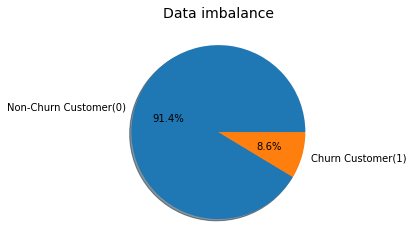

In [79]:
x = ['Non-Churn Customer(0)','Churn Customer(1)']
y = df_hvc.churn.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct='%1.1f%%',shadow=True)
plt.title('Data imbalance',fontsize=14)
plt.show()

### We can see most of our data(91%) is non-churn customers, so the dataset we have has imbalance with respect to target(churn)

### Deriving new variables

* The difference between 8th month and previous months can be key in identifying churn, so we can calculate the difference between 8th month and average of 6th and 7th month.

In [80]:
df_hvc['spl_ic_mou_change'] = df_hvc.spl_ic_mou_8 - ((df_hvc.spl_ic_mou_6 + df_hvc.spl_ic_mou_7)/2)

df_hvc['total_ic_mou_change'] = df_hvc.total_ic_mou_8 - ((df_hvc.total_ic_mou_6 + df_hvc.total_ic_mou_7)/2)

df_hvc['total_rech_num_change'] = df_hvc.total_rech_num_8 - ((df_hvc.total_rech_num_6 + df_hvc.total_rech_num_7)/2)

df_hvc['total_rech_amt_change'] = df_hvc.total_rech_amt_8 - ((df_hvc.total_rech_amt_6 + df_hvc.total_rech_amt_7)/2)

df_hvc['max_rech_amt_change'] = df_hvc.max_rech_amt_8 - ((df_hvc.max_rech_amt_6 + df_hvc.max_rech_amt_7)/2)

df_hvc['total_rech_data_change'] = df_hvc.total_rech_data_8 - ((df_hvc.total_rech_data_6 + df_hvc.total_rech_data_7)/2)

df_hvc['max_rech_data_change'] = df_hvc.max_rech_data_8 - ((df_hvc.max_rech_data_6 + df_hvc.max_rech_data_7)/2)

df_hvc['av_rech_amt_data_change'] = df_hvc.av_rech_amt_data_8 - ((df_hvc.av_rech_amt_data_6 + df_hvc.av_rech_amt_data_7)/2)

df_hvc['vol_2g_mb_change'] = df_hvc.vol_2g_mb_8 - ((df_hvc.vol_2g_mb_6 + df_hvc.vol_2g_mb_7)/2)

df_hvc['vol_3g_mb_change'] = df_hvc.vol_3g_mb_8 - ((df_hvc.vol_3g_mb_6 + df_hvc.vol_3g_mb_7)/2)

df_hvc['arpu_change'] = df_hvc.arpu_8 - ((df_hvc.arpu_6 + df_hvc.arpu_7)/2)

df_hvc['onnet_mou_change'] = df_hvc.onnet_mou_8 - ((df_hvc.onnet_mou_6 + df_hvc.onnet_mou_7)/2)

df_hvc['offnet_mou_change'] = df_hvc.offnet_mou_8 - ((df_hvc.offnet_mou_6 + df_hvc.offnet_mou_7)/2)

df_hvc['roam_ic_mou_change'] = df_hvc.roam_ic_mou_8 - ((df_hvc.roam_ic_mou_6 + df_hvc.roam_ic_mou_7)/2)

df_hvc['roam_og_mou_change'] = df_hvc.roam_og_mou_8 - ((df_hvc.roam_og_mou_6 + df_hvc.roam_og_mou_7)/2)

df_hvc['loc_og_mou_change'] = df_hvc.loc_og_mou_8 - ((df_hvc.loc_og_mou_6 + df_hvc.loc_og_mou_7)/2)

df_hvc['std_og_mou_change'] = df_hvc.std_og_mou_8 - ((df_hvc.std_og_mou_6 + df_hvc.std_og_mou_7)/2)

df_hvc['isd_og_mou_change'] = df_hvc.isd_og_mou_8 - ((df_hvc.isd_og_mou_6 + df_hvc.isd_og_mou_7)/2)

df_hvc['spl_og_mou_change'] = df_hvc.spl_og_mou_8 - ((df_hvc.spl_og_mou_6 + df_hvc.spl_og_mou_7)/2)

df_hvc['total_og_mou_change'] = df_hvc.total_og_mou_8 - ((df_hvc.total_og_mou_6 + df_hvc.total_og_mou_7)/2)

df_hvc['loc_ic_mou_change'] = df_hvc.loc_ic_mou_8 - ((df_hvc.loc_ic_mou_6 + df_hvc.loc_ic_mou_7)/2)

df_hvc['std_ic_mou_change'] = df_hvc.std_ic_mou_8 - ((df_hvc.std_ic_mou_6 + df_hvc.std_ic_mou_7)/2)

df_hvc['isd_ic_mou_change'] = df_hvc.isd_ic_mou_8 - ((df_hvc.isd_ic_mou_6 + df_hvc.isd_ic_mou_7)/2)

In [81]:
df_hvc.shape

(30011, 164)

### EDA:

In [82]:
# Seperate categoric columns and numeric columns
categoric_columns = [col for col in categoric_columns if col not in sept_columns_list]
categoric_columns.append('churn')
numeric_columns = [col for col in df_hvc.columns if col not in categoric_columns]

In [83]:
categoric_columns

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn']

In [84]:
len(categoric_columns)

7

In [85]:
len(numeric_columns)

157

In [86]:
# Ensuring categoric columns are categorical type and numeric columns are numerical
df_hvc[numeric_columns] = df_hvc[numeric_columns].apply(pd.to_numeric)

In [87]:
df_hvc[categoric_columns]=df_hvc[categoric_columns].astype('category')
df_hvc[categoric_columns].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,churn
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
1,-1.0,0.0,0.0,-1.0,1.0,1.0,0
2,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [88]:
df_hvc['night_pck_user_6'].dtype

CategoricalDtype(categories=[-1.0, 0.0, 1.0], ordered=False)

In [89]:
df_hvc.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 164 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   spl_ic_mou_8             float64 
 1   loc_ic_t2t_mou_8         float64 
 2   std_og_t2f_mou_8         float64 
 3   isd_ic_mou_8             float64 
 4   loc_og_mou_8             float64 
 5   std_og_t2m_mou_8         float64 
 6   og_others_8              float64 
 7   spl_og_mou_8             float64 
 8   loc_ic_t2m_mou_8         float64 
 9   std_og_t2t_mou_8         float64 
 10  onnet_mou_8              float64 
 11  std_ic_mou_8             float64 
 12  roam_og_mou_8            float64 
 13  isd_og_mou_8             float64 
 14  loc_ic_mou_8             float64 
 15  loc_og_t2c_mou_8         float64 
 16  std_ic_t2f_mou_8         float64 
 17  ic_others_8              float64 
 18  offnet_mou_8             float64 
 19  loc_og_t2f_mou_8         float64 
 20  std_ic_t2m_mou_8         fl

### Writing functions for univariate and bivariate analysis

In [90]:
def univariate_analysis(column, stats=True):
    
    if (column.dtype == np.int64 or np.float64):
        sns.distplot(column)
        plt.show()
        print(column.describe()) 
        sns.boxplot(column)
        plt.show()
    else :
        sns.countplot(variable)
        print(variable.value_counts())
            
        
def bivariate_analysis(column1, column2):
    
    if (((column1.dtype == np.int64) or (column1.dtype == np.float64)) and ((column2.dtype == np.int64) or (column2.dtype == np.float64))):
        sns.regplot(column1, column2)
    else:   
        sns.boxplot(column1, column2)

### Univariate Analysis

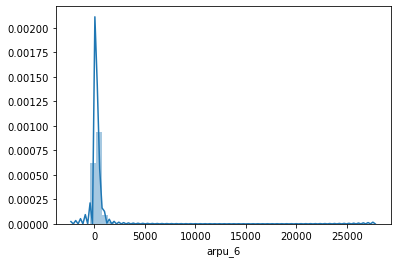

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


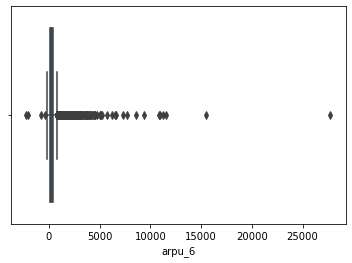

In [91]:
univariate_analysis(df.arpu_6)

### The average revenue per user is left skewed, indicating that some customers are very high revenue generating compared to others

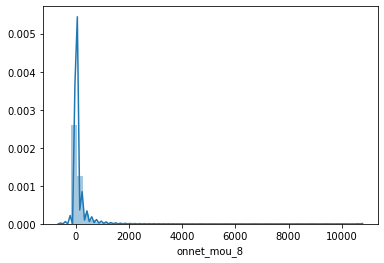

count    99999.000000
mean       129.231820
std        303.243690
min       -634.421811
25%          6.330000
50%         31.090000
75%        112.150000
max      10752.560000
Name: onnet_mou_8, dtype: float64


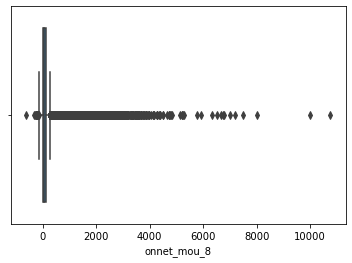

In [92]:
univariate_analysis(df.onnet_mou_8)

### Box plot clearly indicates presense of outliers for MOU, which is treated in outlier treatment section

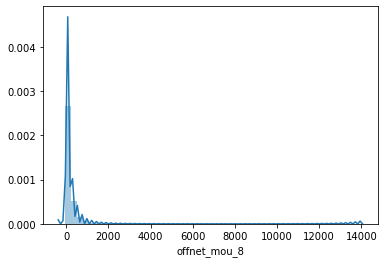

count    99999.000000
mean       191.698724
std        321.304473
min       -335.591299
25%         31.460000
50%         88.240000
75%        220.860000
max      14007.340000
Name: offnet_mou_8, dtype: float64


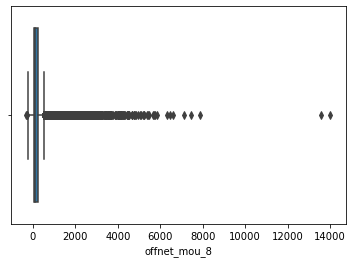

In [93]:
univariate_analysis(df.offnet_mou_8)

### Some variables are skewed towards left and many variables have outliers which needs to be treated

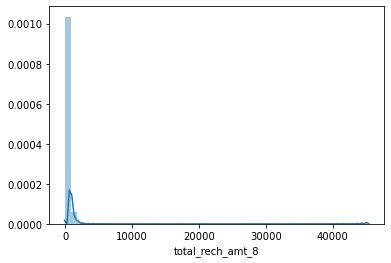

count    99999.000000
mean       324.157122
std        416.540455
min          0.000000
25%         90.000000
50%        225.000000
75%        434.500000
max      45320.000000
Name: total_rech_amt_8, dtype: float64


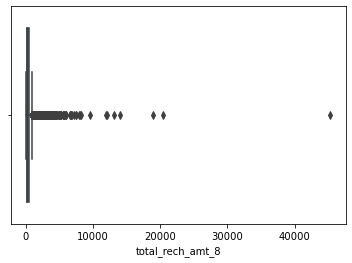

In [94]:
univariate_analysis(df.total_rech_amt_8)

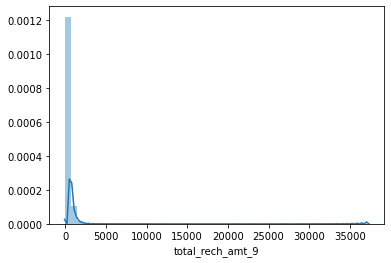

count    99999.000000
mean       303.345673
std        404.588583
min          0.000000
25%         52.000000
50%        200.000000
75%        415.000000
max      37235.000000
Name: total_rech_amt_9, dtype: float64


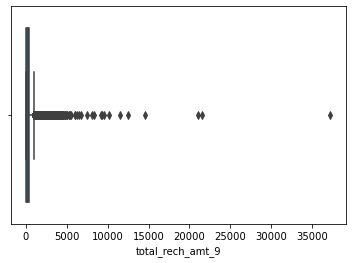

In [95]:
univariate_analysis(df.total_rech_amt_9)

### The mean total recharge amount has decreased for month 9, indicating decrease in usage

### Bivariate Analysis

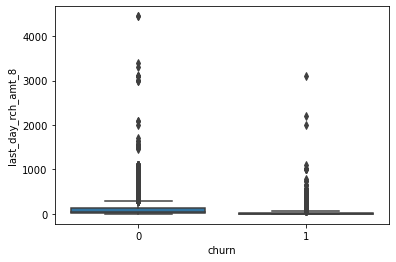

In [96]:
bivariate_analysis(df_hvc.churn, df_hvc.last_day_rch_amt_8)

### The recharge amt is higher for the section of users who haven't churned

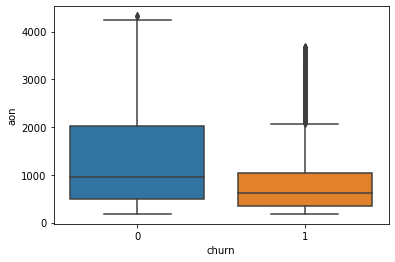

In [97]:
bivariate_analysis(df_hvc.churn, df_hvc.aon)

In [98]:
df_hvc.shape

(30011, 164)

### AON is age on network, number of days customer is on network
* It can be inferred that the customer who don't churn have higher AON compared to customers who churn
* Hence telecom operator must give extra attention to newly joined customers

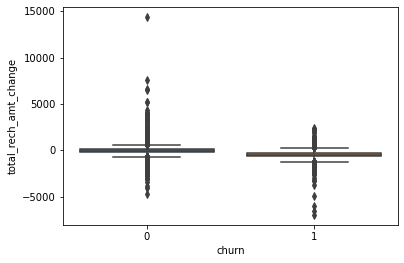

In [99]:
bivariate_analysis( df_hvc.churn,df_hvc.total_rech_amt_change )

### It can be seen for churn customers, the median of total recharge amount change (8th month - avg(6th and 7th month)) is negative
* When the change in recharge amount is negative, there is a high chance that customer might churn

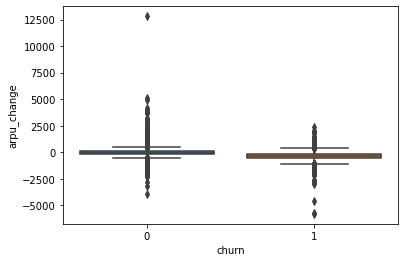

In [100]:
bivariate_analysis( df_hvc.churn,df_hvc.arpu_change )

### When change is ARPU (average revenue per customer) is negative, there is higher chance of churn

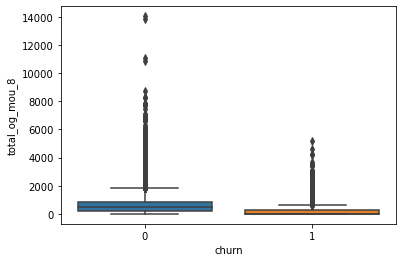

In [101]:
bivariate_analysis( df_hvc.churn,df_hvc.total_og_mou_8)

### Customer who doesn't churn generally have higher minutes of usage of outgoing calls

### Outlier Treatment

### capping using k sigma technique

In [102]:
### function to treat outliers in numeric columns
### Here k=3 for k sigma technique
### reference https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
def outlier_treatment(columns):
    upper_limit = columns.mean() + 3*columns.std()
    lower_limit = columns.mean() - 3*columns.std()
    columns[columns<lower_limit] = lower_limit
    columns[columns>upper_limit] = upper_limit
    return columns

In [103]:
### applying function to numeric columns
df_hvc[numeric_columns] = df_hvc[numeric_columns].apply(outlier_treatment, axis=0)

In [104]:
df_hvc.shape

(30011, 164)

### Dummy Variable Creation:

In [105]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

dummy1 = pd.get_dummies(df_hvc[['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']], drop_first=True)
dummy1.head()

,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
# Adding the results to the train dataframe

df_hvc = pd.concat([df_hvc, dummy1], axis=1)
df_hvc.head()

,spl_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2f_mou_8,isd_ic_mou_8,loc_og_mou_8,std_og_t2m_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,std_ic_t2f_mou_8,ic_others_8,offnet_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,std_og_mou_8,ic_others_6,isd_ic_mou_6,std_ic_t2m_mou_6,spl_ic_mou_6,og_others_6,std_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6,loc_ic_t2t_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,roam_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,roam_ic_mou_6,offnet_mou_6,std_og_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2m_mou_7,roam_ic_mou_7,onnet_mou_7,loc_ic_t2m_mou_7,loc_ic_mou_7,roam_og_mou_7,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_mou_7,spl_ic_mou_7,std_og_t2f_mou_7,std_ic_t2m_mou_7,std_og_t2t_mou_7,std_ic_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,std_ic_t2f_mou_7,loc_og_t2f_mou_7,spl_og_mou_7,isd_og_mou_7,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn,spl_ic_mou_change,total_ic_mou_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,total_rech_data_change,max_rech_data_change,av_rech_amt_data_change,vol_2g_mb_change,vol_3g_mb_change,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,loc_og_mou_change,std_og_mou_change,isd_og_mou_change,spl_og_mou_change,total_og_mou_change,loc_ic_mou_change,std_ic_mou_change,isd_ic_mou_change,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,0.0,27.31,16.68,31.590000,255.79,49.14,0.0,6.50,121.19,12.01,52.29,193.940000,38.06,10.01,188.04,0.00,22.21,15.14,325.91,53.23,141.33,39.53,162.28,30.39,31.64,40.28,77.84,15.740000,2.060000,91.44,0.21,0.00,180.54,36.89,427.88,152.16,217.56,58.14,52.19,0.0,62.13,6.66,0.0,51.39,422.16,23.74,4.30,49.89,16.23,453.43,60.86,57.84,4.50,308.63,567.16,101.46,447.38,33.49,54.68,221.49,355.23,12.59,32.26,31.38,11.83,15.19,0.0,31.76,14.53,75.14,0.0,20.08,126.99,23.29,173.08,533.91,0.0,34.24,55.14,0.00,0.18,1069.180,1349.850,2011.636191,487.53,609.24,350.16,626.46,558.04,428.74,5.0,5.0,7.0,1580.0,790.0,2419.103689,695.523692,720.297223,680.686774,0.0,0.0,531.434383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1185.0,1,-0.105,-163.510,2.0,1191.648096,395.0,0.0,0.0,0.0,0.00,0.000,970.053246,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.225,-203.515,17.130,23.295000,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.31,0.00,0.000000,63.04,75.69,0.0,10.23,15.48,22.58,35.08,0.750000,0.00,0.00,15.79,7.15,0.00,0.00,136.48,0.00,0.65,0.00,50.54,0.10,0.00,12.49,98.28,0.000000,0.000000,22.43,0.00,0.00,22.43,0.00,81.43,0.00,57.58,23.84,0.00,0.0,0.00,0.00,0.0,297.13,378.09,0.00,116.56,13.69,0.00,94.66,130.26

In [107]:
df_hvc.shape

(30011, 176)

In [108]:
#dropping columns whose dummy variable have been created
df_hvc = df_hvc.drop(['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8'], axis = 1)
df_hvc.head()

,spl_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2f_mou_8,isd_ic_mou_8,loc_og_mou_8,std_og_t2m_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,std_ic_t2f_mou_8,ic_others_8,offnet_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,std_og_mou_8,ic_others_6,isd_ic_mou_6,std_ic_t2m_mou_6,spl_ic_mou_6,og_others_6,std_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6,loc_ic_t2t_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,roam_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,roam_ic_mou_6,offnet_mou_6,std_og_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2m_mou_7,roam_ic_mou_7,onnet_mou_7,loc_ic_t2m_mou_7,loc_ic_mou_7,roam_og_mou_7,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_mou_7,spl_ic_mou_7,std_og_t2f_mou_7,std_ic_t2m_mou_7,std_og_t2t_mou_7,std_ic_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,std_ic_t2f_mou_7,loc_og_t2f_mou_7,spl_og_mou_7,isd_og_mou_7,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn,spl_ic_mou_change,total_ic_mou_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,total_rech_data_change,max_rech_data_change,av_rech_amt_data_change,vol_2g_mb_change,vol_3g_mb_change,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,loc_og_mou_change,std_og_mou_change,isd_og_mou_change,spl_og_mou_change,total_og_mou_change,loc_ic_mou_change,std_ic_mou_change,isd_ic_mou_change,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,0.0,27.31,16.68,31.590000,255.79,49.14,0.0,6.50,121.19,12.01,52.29,193.940000,38.06,10.01,188.04,0.00,22.21,15.14,325.91,53.23,141.33,39.53,162.28,30.39,31.64,40.28,77.84,15.740000,2.060000,91.44,0.21,0.00,180.54,36.89,427.88,152.16,217.56,58.14,52.19,0.0,62.13,6.66,0.0,51.39,422.16,23.74,4.30,49.89,16.23,453.43,60.86,57.84,4.50,308.63,567.16,101.46,447.38,33.49,54.68,221.49,355.23,12.59,32.26,31.38,11.83,15.19,0.0,31.76,14.53,75.14,0.0,20.08,126.99,23.29,173.08,533.91,0.0,34.24,55.14,0.00,0.18,1069.180,1349.850,2011.636191,487.53,609.24,350.16,626.46,558.04,428.74,5.0,5.0,7.0,1580.0,790.0,2419.103689,695.523692,720.297223,680.686774,0.0,0.0,531.434383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1185.0,1,-0.105,-163.510,2.0,1191.648096,395.0,0.0,0.0,0.0,0.00,0.000,970.053246,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.225,-203.515,17.130,23.295000,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.31,0.00,0.000000,63.04,75.69,0.0,10.23,15.48,22.58,35.08,0.750000,0.00,0.00,15.79,7.15,0.00,0.00,136.48,0.00,0.65,0.00,50.54,0.10,0.00,12.49,98.28,0.000000,0.000000,22.43,0.00,0.00,22.43,0.00,81.43,0.00,57.58,23.84,0.00,0.0,0.00,0.00,0.0,297.13,378.09,0.00,116.56,13.69,0.00,94.66,130.26,413.69,0.00,80.96,80.63,0.00,70.58,0.00,351.03,13.98,23.83,0.00,9.84,217.59,0.58,0.00,0.0,10.04,0.00,143.48,0.

In [109]:
df_hvc.shape

(30011, 170)

### Train Test Split:

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
df_hvc['churn'] = pd.to_numeric(df_hvc['churn'])

In [112]:
X = df_hvc.drop('churn', axis = 1)
y = df_hvc.churn

In [113]:
X.shape

(30011, 169)

In [114]:
# scaling (the dataframe is converted to a numpy array)
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['spl_ic_mou_8', 'loc_ic_t2t_mou_8', 'std_og_t2f_mou_8', 'isd_ic_mou_8',
       'loc_og_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'spl_og_mou_8',
       'loc_ic_t2m_mou_8', 'std_og_t2t_mou_8',
       ...
       'night_pck_user_7_0.0', 'night_pck_user_7_1.0', 'night_pck_user_8_0.0',
       'night_pck_user_8_1.0', 'fb_user_6_0.0', 'fb_user_6_1.0',
       'fb_user_7_0.0', 'fb_user_7_1.0', 'fb_user_8_0.0', 'fb_user_8_1.0'],
      dtype='object', length=169)

In [115]:
X.shape

(30011, 169)

In [116]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100,stratify = y)

In [117]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21007, 169)
(21007,)
(9004, 169)
(9004,)


### SMOTE:

#### Handling imbalance using SMOTE
#### https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21007, 169)
Number transactions y_train dataset:  (21007,)
Number transactions X_test dataset:  (9004, 169)
Number transactions y_test dataset:  (9004,)


In [120]:
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '0': 19192 

After OverSampling, the shape of train_X: (38384, 169)
After OverSampling, the shape of train_y: (38384,) 

After OverSampling, counts of label '1': 19192
After OverSampling, counts of label '0': 19192


#### Class 0 and 1 both have 19192 data points after SMOTE

### Interpretable Model Without PCA

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [122]:
logreg_withoutpca = LogisticRegression()

### Using RFE for feature elimination

In [123]:
%%time
from sklearn.feature_selection import RFE
rfe = RFE(logreg_withoutpca, 20)           
rfe = rfe.fit(X_train_res , y_train_res)

Wall time: 1min 32s


In [124]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [125]:
list(zip(X_train_res.columns, rfe.support_, rfe.ranking_))

[('spl_ic_mou_8', False, 9),
 ('loc_ic_t2t_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 62),
 ('isd_ic_mou_8', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_8', False, 19),
 ('og_others_8', False, 77),
 ('spl_og_mou_8', False, 128),
 ('loc_ic_t2m_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 2),
 ('onnet_mou_8', False, 18),
 ('std_ic_mou_8', True, 1),
 ('roam_og_mou_8', False, 11),
 ('isd_og_mou_8', False, 138),
 ('loc_ic_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 115),
 ('std_ic_t2f_mou_8', False, 49),
 ('ic_others_8', False, 60),
 ('offnet_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 58),
 ('std_ic_t2m_mou_8', False, 48),
 ('loc_ic_t2f_mou_8', False, 57),
 ('loc_og_t2m_mou_8', False, 12),
 ('std_ic_t2t_mou_8', False, 27),
 ('roam_ic_mou_8', False, 114),
 ('loc_og_t2t_mou_8', False, 3),
 ('std_og_mou_8', True, 1),
 ('ic_others_6', False, 107),
 ('isd_ic_mou_6', False, 109),
 ('std_ic_t2m_mou_6', False, 87),
 ('spl_ic_mou_6', False, 82),
 ('og_others_6', False, 91),


In [126]:
col = X_train_res.columns[rfe.support_]

In [127]:
col

Index(['loc_ic_t2t_mou_8', 'isd_ic_mou_8', 'loc_og_mou_8', 'loc_ic_t2m_mou_8',
       'std_ic_mou_8', 'loc_ic_mou_8', 'offnet_mou_8', 'std_og_mou_8',
       'offnet_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'arpu_8',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_6', 'last_day_rch_amt_8', 'max_rech_data_8',
       'total_ic_mou_change', 'total_rech_num_change'],
      dtype='object')

### Assessing the model with StatsModels

In [128]:
import statsmodels.api as sm

In [129]:
X_train_res_sm = sm.add_constant(X_train_res[col])
logm1 = sm.GLM(y_train_res,X_train_res_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38363
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Apr 2021   Deviance:                          nan
Time:                        21:52:24   Pearson chi2:                 1.57e+11
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.9294      0.029    -67.525      0.000      -1.985      -1.873
loc_ic_t2t_mou_8          0.4448      0.103      4.326      0.000       0.243       0.646
isd_ic_mou_8              0.9096      0.040     23.019      0.000       0.832       0.987
loc_og_mou_8              0.1774      0.081      2.199      0.028       0.019       0.336
loc_ic_t2m_mou_8          0.6885      0.185      3.722      0.000       0.326       1.051
std_ic_mou_8              1.9553      0.078     25.114      0.000       1.803       2.108
loc_ic_mou_8              4.8069      0.335     14.365      0.000       4.151       5.463
offnet_mou_8             -0.3283      0.037     -8.801      0.000      -0.401      -0.255
std_og_mou_8              1.1533      0.120      9.578      0.000       0.917       1.389
offnet_mou_7              1.1673      0.081     14.375      0.000       1.008       1.326
loc_og_t2m_mou_7         -0.6903      0.052    -13.167      0.000      -0.793      -0.588
std_og_t2m_mou_7         -0.7792      0.070    -11.053      0.000      -0.917      -0.641
arpu_8                    0.4426      0.033     13.485      0.000       0.378       0.507
total_og_mou_8           -1.6069      0.134    -11.999      0.000      -1.869      -1.344
total_ic_mou_6           -0.7298      0.064    -11.408      0.000      -0.855      -0.604
total_ic_mou_8           -7.4839      0.273    -27.420      0.000      -8.019      -6.949
total_rech_num_6         -0.4618      0.022    -21.079      0.000      -0.505      -0.419
last_day_rch_amt_8       -0.6736      0.024    -27.750      0.000      -0.721      -0.626
max_rech_data_8          -0.7456      0.025    -30.209      0.000      -0.794      -0.697
total_ic_mou_change      -0.8539      0.052    -16.361      0.000      -0.956      -0.752
total_rech_num_change    -0.6796      0.024    -28.168      0.000      -0.727      -0.632
=========================================================================================
"""

In [130]:
# Getting the predicted values on the train set
y_train_pred_logwithoutpca = res.predict(X_train_res_sm)
y_train_pred_logwithoutpca[:10]

0    0.248336
1    0.271556
2    0.076504
3    0.361685
4    0.011571
5    0.529574
6    0.352918
7    0.099235
8    0.100460
9    0.048237
dtype: float64

In [131]:
y_train_pred_logwithoutpca = y_train_pred_logwithoutpca.values.reshape(-1)
y_train_pred_logwithoutpca[:10]

array([0.24833565, 0.27155606, 0.07650415, 0.36168524, 0.01157097,
       0.52957373, 0.35291822, 0.09923519, 0.10045963, 0.04823701])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [132]:
y_train_pred_final_logwithoutpca = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_train_pred_logwithoutpca})
y_train_pred_final_logwithoutpca.head()

,Churn,Churn_Prob
0,0,0.248336
1,0,0.271556
2,0,0.076504
3,0,0.361685
4,0,0.011571


In [133]:
y_train_pred_final_logwithoutpca['predicted'] = y_train_pred_final_logwithoutpca.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_logwithoutpca.head()

,Churn,Churn_Prob,predicted
0,0,0.248336,0
1,0,0.271556,0
2,0,0.076504,0
3,0,0.361685,0
4,0,0.011571,0


In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_logwithoutpca.Churn, y_train_pred_final_logwithoutpca.predicted )
print(confusion)

[[16121  3071]
 [ 2751 16441]]


In [135]:
print(metrics.accuracy_score(y_train_pred_final_logwithoutpca.Churn, y_train_pred_final_logwithoutpca.predicted))

0.8483222175906627


### Check VIF

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,43.61
8,offnet_mou_7,22.79
3,loc_ic_t2m_mou_8,20.20
10,std_og_t2m_mou_7,18.82
14,total_ic_mou_8,13.98
12,total_og_mou_8,12.51
7,std_og_mou_8,8.96
13,total_ic_mou_6,8.62
9,loc_og_t2m_mou_7,7.10
2,loc_og_mou_8,6.58


### Dropping High VIF column one by one and building model again

In [138]:
col=col.drop('loc_og_mou_8')
col

Index(['loc_ic_t2t_mou_8', 'isd_ic_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8',
       'loc_ic_mou_8', 'offnet_mou_8', 'std_og_mou_8', 'offnet_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'arpu_8', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_6',
       'last_day_rch_amt_8', 'max_rech_data_8', 'total_ic_mou_change',
       'total_rech_num_change'],
      dtype='object')

### Model 2

In [139]:
X_train_res_sm = sm.add_constant(X_train_res[col])
logm2 = sm.GLM(y_train_res,X_train_res_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38364
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Apr 2021   Deviance:                          nan
Time:                        21:52:27   Pearson chi2:                 2.69e+11
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.9398      0.028    -68.618      0.000      -1.995      -1.884
loc_ic_t2t_mou_8          0.4555      0.103      4.438      0.000       0.254       0.657
isd_ic_mou_8              0.9211      0.039     23.577      0.000       0.845       0.998
loc_ic_t2m_mou_8          0.6864      0.185      3.712      0.000       0.324       1.049
std_ic_mou_8              1.9865      0.076     26.092      0.000       1.837       2.136
loc_ic_mou_8              4.9104      0.330     14.868      0.000       4.263       5.558
offnet_mou_8             -0.3044      0.036     -8.566      0.000      -0.374      -0.235
std_og_mou_8              0.9505      0.073     12.979      0.000       0.807       1.094
offnet_mou_7              1.1342      0.080     14.260      0.000       0.978       1.290
loc_og_t2m_mou_7         -0.6519      0.049    -13.176      0.000      -0.749      -0.555
std_og_t2m_mou_7         -0.7614      0.070    -10.903      0.000      -0.898      -0.624
arpu_8                    0.4393      0.033     13.395      0.000       0.375       0.504
total_og_mou_8           -1.3848      0.083    -16.660      0.000      -1.548      -1.222
total_ic_mou_6           -0.7199      0.064    -11.276      0.000      -0.845      -0.595
total_ic_mou_8           -7.6062      0.266    -28.608      0.000      -8.127      -7.085
total_rech_num_6         -0.4634      0.022    -21.169      0.000      -0.506      -0.421
last_day_rch_amt_8       -0.6746      0.024    -27.775      0.000      -0.722      -0.627
max_rech_data_8          -0.7474      0.025    -30.280      0.000      -0.796      -0.699
total_ic_mou_change      -0.8410      0.052    -16.218      0.000      -0.943      -0.739
total_rech_num_change    -0.6820      0.024    -28.288      0.000      -0.729      -0.635
=========================================================================================
"""

In [140]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,42.55
7,offnet_mou_7,22.46
2,loc_ic_t2m_mou_8,20.20
9,std_og_t2m_mou_7,18.79
13,total_ic_mou_8,12.69
12,total_ic_mou_6,8.61
11,total_og_mou_8,7.82
0,loc_ic_t2t_mou_8,6.48
8,loc_og_t2m_mou_7,6.16
17,total_ic_mou_change,5.94


In [141]:
col=col.drop(['loc_ic_mou_8','loc_ic_t2m_mou_8'])
col

Index(['loc_ic_t2t_mou_8', 'isd_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8',
       'std_og_mou_8', 'offnet_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7',
       'arpu_8', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_6', 'last_day_rch_amt_8', 'max_rech_data_8',
       'total_ic_mou_change', 'total_rech_num_change'],
      dtype='object')

### Model 3

In [142]:
X_train_res_sm = sm.add_constant(X_train_res[col])
logm3 = sm.GLM(y_train_res,X_train_res_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38366
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14949.
Date:                Mon, 05 Apr 2021   Deviance:                       29897.
Time:                        21:52:28   Pearson chi2:                 2.19e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.9306      0.028    -68.604      0.000      -1.986      -1.875
loc_ic_t2t_mou_8          0.6299      0.041     15.523      0.000       0.550       0.709
isd_ic_mou_8              0.2624      0.024     10.889      0.000       0.215       0.310
std_ic_mou_8              0.3492      0.033     10.577      0.000       0.285       0.414
offnet_mou_8             -0.1071      0.035     -3.083      0.002      -0.175      -0.039
std_og_mou_8              1.2788      0.072     17.771      0.000       1.138       1.420
offnet_mou_7              0.9878      0.080     12.409      0.000       0.832       1.144
loc_og_t2m_mou_7         -0.4198      0.048     -8.662      0.000      -0.515      -0.325
std_og_t2m_mou_7         -0.7611      0.070    -10.842      0.000      -0.899      -0.623
arpu_8                    0.3475      0.033     10.611      0.000       0.283       0.412
total_og_mou_8           -1.7827      0.082    -21.726      0.000      -1.944      -1.622
total_ic_mou_6           -0.4686      0.062     -7.529      0.000      -0.591      -0.347
total_ic_mou_8           -1.7544      0.086    -20.315      0.000      -1.924      -1.585
total_rech_num_6         -0.5119      0.022    -23.240      0.000      -0.555      -0.469
last_day_rch_amt_8       -0.6367      0.024    -26.673      0.000      -0.683      -0.590
max_rech_data_8          -0.6576      0.024    -27.870      0.000      -0.704      -0.611
total_ic_mou_change      -0.6909      0.051    -13.495      0.000      -0.791      -0.591
total_rech_num_change    -0.7228      0.024    -29.567      0.000      -0.771      -0.675
=========================================================================================
"""

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,offnet_mou_7,22.27
7,std_og_t2m_mou_7,18.66
11,total_ic_mou_8,10.03
10,total_ic_mou_6,7.72
9,total_og_mou_8,7.68
6,loc_og_t2m_mou_7,5.89
15,total_ic_mou_change,5.81
4,std_og_mou_8,5.51
8,arpu_8,4.57
3,offnet_mou_8,3.88


In [144]:
col=col.drop(['total_ic_mou_8'])
col

Index(['loc_ic_t2t_mou_8', 'isd_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8',
       'std_og_mou_8', 'offnet_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7',
       'arpu_8', 'total_og_mou_8', 'total_ic_mou_6', 'total_rech_num_6',
       'last_day_rch_amt_8', 'max_rech_data_8', 'total_ic_mou_change',
       'total_rech_num_change'],
      dtype='object')

### Model 4

In [145]:
X_train_res_sm = sm.add_constant(X_train_res[col])
logm4 = sm.GLM(y_train_res,X_train_res_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38367
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15202.
Date:                Mon, 05 Apr 2021   Deviance:                       30403.
Time:                        21:52:28   Pearson chi2:                 1.03e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8252      0.026    -69.077      0.000      -1.877      -1.773
loc_ic_t2t_mou_8          0.2403      0.032      7.616      0.000       0.178       0.302
isd_ic_mou_8              0.1358      0.022      6.233      0.000       0.093       0.179
std_ic_mou_8              0.0469      0.027      1.724      0.085      -0.006       0.100
offnet_mou_8             -0.0365      0.034     -1.058      0.290      -0.104       0.031
std_og_mou_8              1.5746      0.071     22.184      0.000       1.435       1.714
offnet_mou_7              1.0803      0.080     13.532      0.000       0.924       1.237
loc_og_t2m_mou_7         -0.6383      0.047    -13.532      0.000      -0.731      -0.546
std_og_t2m_mou_7         -0.9006      0.070    -12.835      0.000      -1.038      -0.763
arpu_8                    0.2773      0.033      8.464      0.000       0.213       0.342
total_og_mou_8           -2.1111      0.081    -25.989      0.000      -2.270      -1.952
total_ic_mou_6           -1.3162      0.046    -28.407      0.000      -1.407      -1.225
total_rech_num_6         -0.4917      0.022    -22.541      0.000      -0.534      -0.449
last_day_rch_amt_8       -0.6341      0.024    -26.475      0.000      -0.681      -0.587
max_rech_data_8          -0.6748      0.024    -28.373      0.000      -0.721      -0.628
total_ic_mou_change      -1.3843      0.040    -34.807      0.000      -1.462      -1.306
total_rech_num_change    -0.7314      0.024    -29.909      0.000      -0.779      -0.683
=========================================================================================
"""

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,offnet_mou_7,22.27
7,std_og_t2m_mou_7,18.60
9,total_og_mou_8,7.58
6,loc_og_t2m_mou_7,5.74
4,std_og_mou_8,5.44
8,arpu_8,4.52
3,offnet_mou_8,3.82
10,total_ic_mou_6,3.39
15,total_rech_num_change,2.76
14,total_ic_mou_change,2.38


In [147]:
col=col.drop(['total_og_mou_8'])
col

Index(['loc_ic_t2t_mou_8', 'isd_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8',
       'std_og_mou_8', 'offnet_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7',
       'arpu_8', 'total_ic_mou_6', 'total_rech_num_6', 'last_day_rch_amt_8',
       'max_rech_data_8', 'total_ic_mou_change', 'total_rech_num_change'],
      dtype='object')

### Model 5

In [148]:
X_train_res_sm = sm.add_constant(X_train_res[col])
logm5 = sm.GLM(y_train_res,X_train_res_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38368
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15710.
Date:                Mon, 05 Apr 2021   Deviance:                       31420.
Time:                        21:52:29   Pearson chi2:                 9.33e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7305      0.026    -67.609      0.000      -1.781      -1.680
loc_ic_t2t_mou_8          0.1302      0.030      4.325      0.000       0.071       0.189
isd_ic_mou_8              0.1772      0.022      8.166      0.000       0.135       0.220
std_ic_mou_8              0.1712      0.026      6.562      0.000       0.120       0.222
offnet_mou_8             -0.0494      0.032     -1.531      0.126      -0.113       0.014
std_og_mou_8             -0.0499      0.025     -1.982      0.048      -0.099      -0.001
offnet_mou_7              1.1376      0.073     15.501      0.000       0.994       1.281
loc_og_t2m_mou_7         -1.0129      0.042    -24.270      0.000      -1.095      -0.931
std_og_t2m_mou_7         -0.9394      0.064    -14.692      0.000      -1.065      -0.814
arpu_8                   -0.1432      0.029     -4.977      0.000      -0.200      -0.087
total_ic_mou_6           -1.6257      0.045    -36.377      0.000      -1.713      -1.538
total_rech_num_6         -0.4856      0.022    -22.489      0.000      -0.528      -0.443
last_day_rch_amt_8       -0.6244      0.024    -26.125      0.000      -0.671      -0.578
max_rech_data_8          -0.5752      0.023    -24.576      0.000      -0.621      -0.529
total_ic_mou_change      -1.7260      0.038    -45.251      0.000      -1.801      -1.651
total_rech_num_change    -0.7949      0.024    -32.586      0.000      -0.843      -0.747
=========================================================================================
"""

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,offnet_mou_7,22.27
7,std_og_t2m_mou_7,18.60
6,loc_og_t2m_mou_7,5.51
3,offnet_mou_8,3.82
8,arpu_8,3.76
9,total_ic_mou_6,3.33
14,total_rech_num_change,2.72
4,std_og_mou_8,2.57
13,total_ic_mou_change,2.25
10,total_rech_num_6,1.85


In [150]:
# Getting the predicted values on the train set
y_train_pred_logwithoutpca = res.predict(X_train_res_sm)
y_train_pred_logwithoutpca[:10]

0    0.253661
1    0.272302
2    0.072462
3    0.253512
4    0.080514
5    0.391196
6    0.644816
7    0.099777
8    0.104579
9    0.074961
dtype: float64

In [151]:
y_train_pred_logwithoutpca = y_train_pred_logwithoutpca.values.reshape(-1)
y_train_pred_logwithoutpca[:10]

array([0.25366129, 0.27230204, 0.07246221, 0.25351215, 0.08051364,
       0.39119555, 0.64481551, 0.09977674, 0.10457947, 0.07496131])

In [152]:
y_train_pred_final_logwithoutpca = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_train_pred_logwithoutpca})
y_train_pred_final_logwithoutpca.head()

,Churn,Churn_Prob
0,0,0.253661
1,0,0.272302
2,0,0.072462
3,0,0.253512
4,0,0.080514


In [153]:
y_train_pred_final_logwithoutpca['predicted'] = y_train_pred_final_logwithoutpca.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_logwithoutpca.head()

,Churn,Churn_Prob,predicted
0,0,0.253661,0
1,0,0.272302,0
2,0,0.072462,0
3,0,0.253512,0
4,0,0.080514,0


In [154]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_logwithoutpca.Churn, y_train_pred_final_logwithoutpca.predicted )
print(confusion)

[[15641  3551]
 [ 2813 16379]]


In [155]:
print(metrics.accuracy_score(y_train_pred_final_logwithoutpca.Churn, y_train_pred_final_logwithoutpca.predicted))

0.8342017507294706


### We have eliminated all high VIF columns, the accuracy hasn't dropped by much

In [156]:
sign = abs(res.params)/(res.params)
abs_value = abs(res.params)
frame = { 'abs_value': abs_value, 'sign':sign}
frame= pd.DataFrame(frame)
frame

,abs_value,sign
const,1.730534,-1.0
loc_ic_t2t_mou_8,0.130161,1.0
isd_ic_mou_8,0.177244,1.0
std_ic_mou_8,0.171237,1.0
offnet_mou_8,0.049404,-1.0
std_og_mou_8,0.049900,-1.0
offnet_mou_7,1.137626,1.0
loc_og_t2m_mou_7,1.012876,-1.0
std_og_t2m_mou_7,0.939380,-1.0
arpu_8,0.143174,-1.0


In [157]:
frame= frame.iloc[1:,:]
frame

,abs_value,sign
loc_ic_t2t_mou_8,0.130161,1.0
isd_ic_mou_8,0.177244,1.0
std_ic_mou_8,0.171237,1.0
offnet_mou_8,0.049404,-1.0
std_og_mou_8,0.049900,-1.0
offnet_mou_7,1.137626,1.0
loc_og_t2m_mou_7,1.012876,-1.0
std_og_t2m_mou_7,0.939380,-1.0
arpu_8,0.143174,-1.0
total_ic_mou_6,1.625725,-1.0


In [158]:
frame.sort_values(by='abs_value',ascending= False)

,abs_value,sign
total_ic_mou_change,1.726004,-1.0
total_ic_mou_6,1.625725,-1.0
offnet_mou_7,1.137626,1.0
loc_og_t2m_mou_7,1.012876,-1.0
std_og_t2m_mou_7,0.939380,-1.0
total_rech_num_change,0.794898,-1.0
last_day_rch_amt_8,0.624394,-1.0
max_rech_data_8,0.575224,-1.0
total_rech_num_6,0.485640,-1.0
isd_ic_mou_8,0.177244,1.0


### We can see that top 5 features are:
##### total_ic_mou_6
##### total_ic_mou_change
##### max_rech_data_8
##### last_day_rch_amt_8
##### total_rech_num_change
#### arpu_change

### Inferences and business insights:
-- Total incoming minutes of usage is key variable, if there is a drop in incoming MOU then probability of churning is high
 
-- Variables dervied using value for 8th month - average (6th and 7th month), like total_ic_mou_change and total_rech_num_change also have significant impact in predicting churn

-- Behaviour is 8 Month plays a vital role in deciding churn

-- When average revenue per user reduces the churn probability increases

-- Also the company needs to focus on the STD and ISD rates as seen from top features dataframe. Special ISD and STD packs can be offered to prevent churn of customers using ISD and STD services.

### PCA:

In [159]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [160]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [161]:
pca.components_

array([[-3.28160033e-03,  9.28365306e-02,  3.69310786e-02, ...,
         1.36300764e-01, -2.41674982e-03,  1.34293824e-01],
       [ 5.38541358e-03,  7.71243030e-02,  1.87015909e-02, ...,
        -7.78638553e-02,  3.60960759e-02, -3.12891821e-02],
       [-1.89432594e-02,  2.47409775e-02,  4.07145916e-03, ...,
         5.99253167e-02, -1.58172006e-02,  1.21840507e-02],
       ...,
       [-2.78467049e-16,  1.57660030e-16,  4.93232420e-17, ...,
         5.54235898e-01,  1.65435885e-01,  3.17997867e-01],
       [-0.00000000e+00,  3.00447089e-18,  7.30768006e-17, ...,
         1.85495096e-01,  6.04141821e-03,  1.16127048e-02],
       [-0.00000000e+00, -5.19145170e-17, -6.22428720e-17, ...,
         3.16254185e-01, -2.93470140e-01, -5.64102997e-01]])

In [162]:
pca.explained_variance_ratio_

array([1.15167856e-01, 8.17058033e-02, 6.42970513e-02, 5.92612278e-02,
       4.39287971e-02, 3.44007484e-02, 3.32000780e-02, 3.28999870e-02,
       2.92521047e-02, 2.60529985e-02, 2.30792754e-02, 1.75577000e-02,
       1.67192061e-02, 1.64724718e-02, 1.51139225e-02, 1.38692204e-02,
       1.35486762e-02, 1.27536828e-02, 1.20835791e-02, 1.17840294e-02,
       1.11257201e-02, 1.03139965e-02, 9.60480055e-03, 9.34630787e-03,
       9.06253270e-03, 8.88592557e-03, 8.49764146e-03, 8.31359249e-03,
       8.18419577e-03, 7.75127143e-03, 7.51097236e-03, 7.45096626e-03,
       7.21623781e-03, 6.90202123e-03, 6.52845844e-03, 6.45278614e-03,
       6.24821457e-03, 6.14330872e-03, 5.94036916e-03, 5.81205572e-03,
       5.56642468e-03, 5.41097465e-03, 5.24994706e-03, 5.04846258e-03,
       4.95565525e-03, 4.73943810e-03, 4.59443077e-03, 4.47385048e-03,
       4.29606199e-03, 4.21055179e-03, 4.15869869e-03, 3.99945074e-03,
       3.74360884e-03, 3.59180128e-03, 3.40285738e-03, 3.27440076e-03,
      

In [163]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

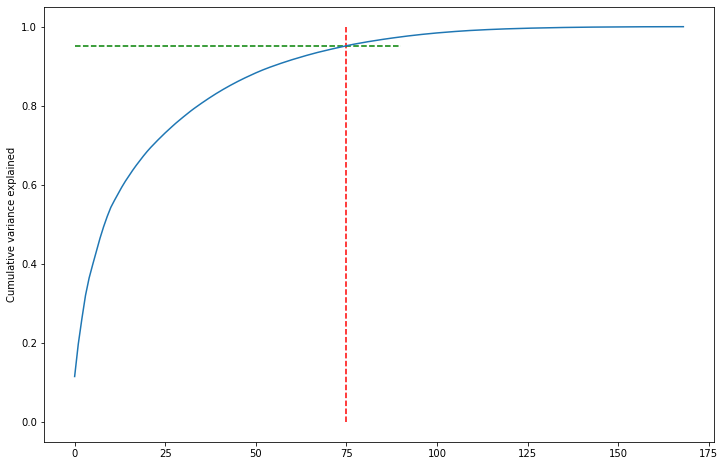

In [164]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=90, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### 95% variance explained by 75 PCA components

In [165]:
from sklearn.decomposition import IncrementalPCA

In [166]:
pca_final = IncrementalPCA(n_components=75)

In [167]:
df_train_pca = pca_final.fit_transform(X_train_res)

In [168]:
df_train_pca.shape

(38384, 75)

In [169]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [170]:
corrmat.shape

(75, 75)

### It can be seen in correlation matrix that multicollinearity is handled as all correlation coeff are close to 0(darker colors)

Wall time: 2.31 s


<AxesSubplot:>

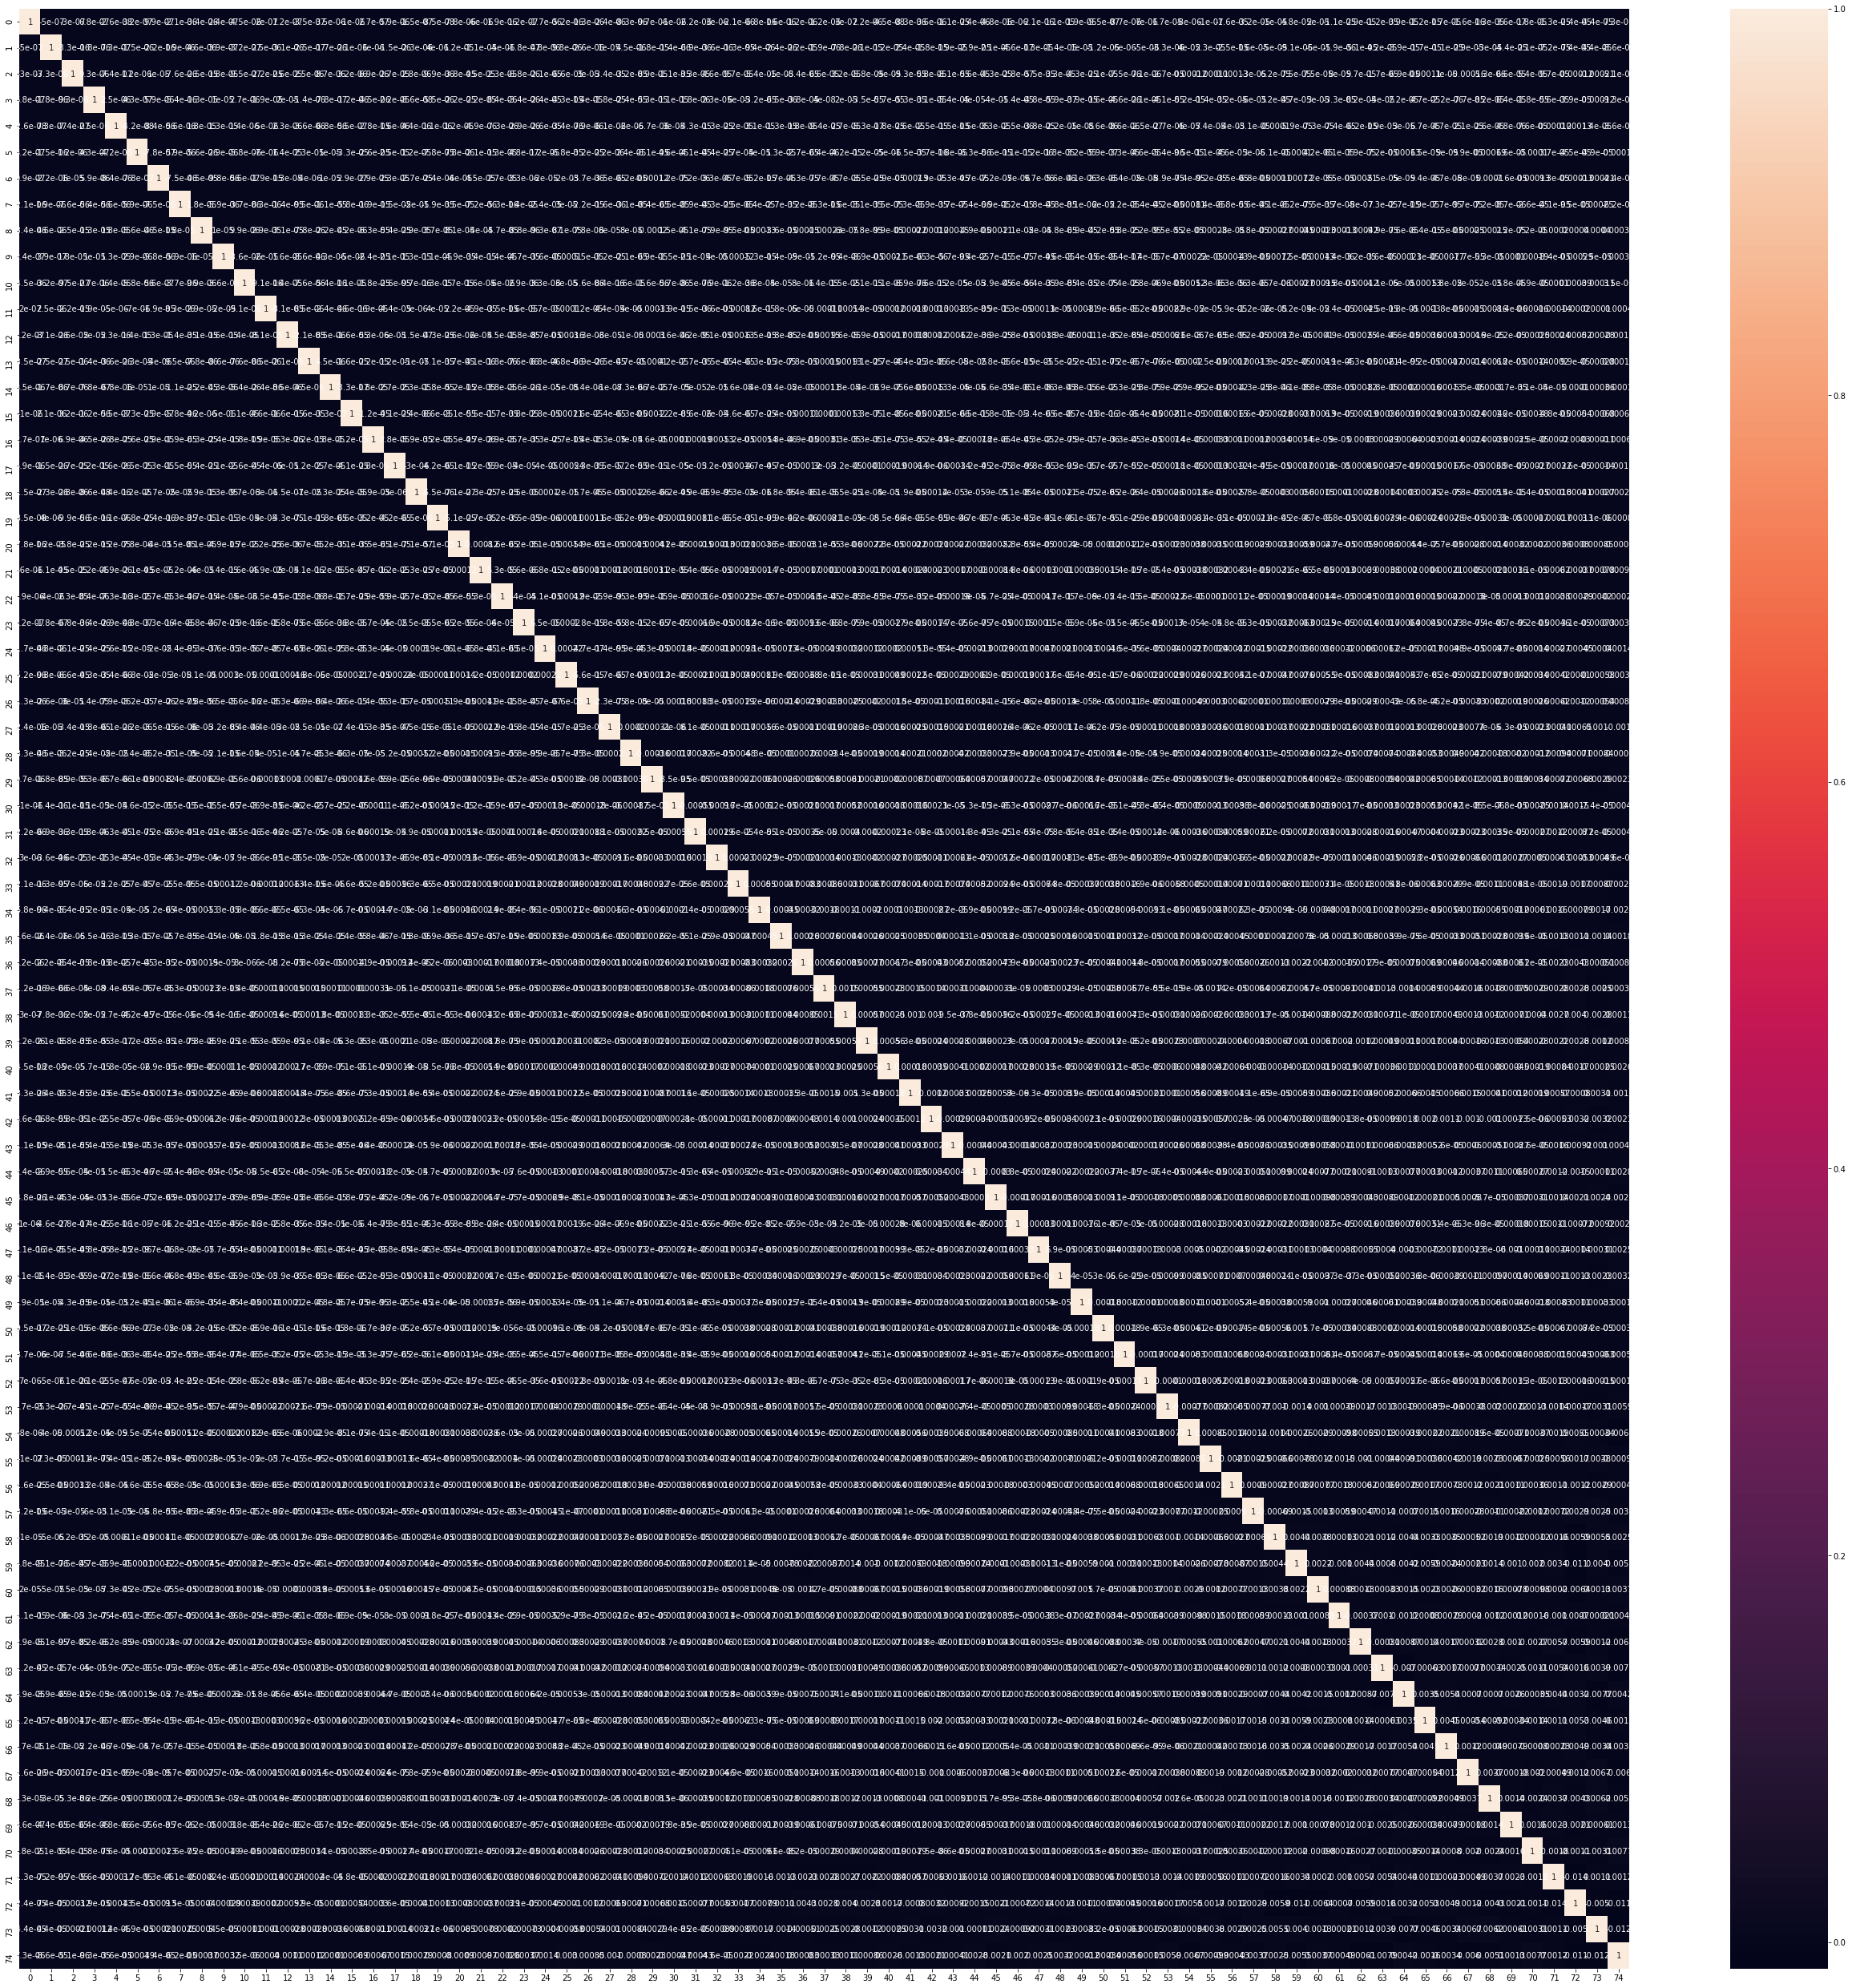

In [171]:
%%time
plt.figure(figsize=[45,45])
sns.heatmap(corrmat, annot=True)

In [172]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 75)

### Applying logistic regression on the data on our Principal components

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [174]:
learner_pca = LogisticRegression(class_weight='balanced')

In [175]:
model_pca = learner_pca.fit(df_train_pca, y_train_res)

In [176]:
# Getting the predicted values on the train set

y_train_pred = model_pca.predict_proba(df_train_pca)
y_train_pred[:,1]

array([0.51174895, 0.35178986, 0.10031772, ..., 0.54410991, 0.87851371,
       0.49704038])

In [177]:
#predict churn in the train set

y_train_pred_val = model_pca.predict(df_train_pca)
y_train_pred_val

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [178]:
#Roc_auc Score of train set

"{:2.2}".format(metrics.roc_auc_score(y_train_res, y_train_pred[:,1]))

'0.91'

In [179]:
# Importing classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

In [180]:
#predict the probability of the churn in test set

pred_probs_test = model_pca.predict_proba(df_test_pca)
pred_probs_test[:,1]

array([0.77873721, 0.07296477, 0.0070787 , ..., 0.00970327, 0.01887568,
       0.11616757])

In [181]:
#predict churn in the test set

pred_probs_test_val = model_pca.predict(df_test_pca)
pred_probs_test_val

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [182]:
#Roc_auc Score of test set

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [183]:
#function to calculate different metrices

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_res, dt_classifier.predict(df_train_pca)))
    print("Train ROC_AUC_Score :", roc_auc_score(y_train_res, dt_classifier.predict(df_train_pca)))
    print("Train Precision Value:", precision_score(y_train_res, dt_classifier.predict(df_train_pca)))
    print("Train Recall Value:", recall_score(y_train_res, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_res, dt_classifier.predict(df_train_pca)))
    print('Train Classification Report:')
    print(classification_report(y_train_res,dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test ROC_AUC_Score :", roc_auc_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Precision Value:", precision_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Recall Value:", recall_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))
    print('Test Classification Report:')
    print(classification_report(y_test,dt_classifier.predict(df_test_pca)))

In [184]:
#evaluate the model

evaluate_model(model_pca)

Train Accuracy : 0.8458732805335556
Train ROC_AUC_Score : 0.8458732805335557
Train Precision Value: 0.8361353048409965
Train Recall Value: 0.8603584827011255
Train Confusion Matrix:
[[15956  3236]
 [ 2680 16512]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     19192
           1       0.84      0.86      0.85     19192

    accuracy                           0.85     38384
   macro avg       0.85      0.85      0.85     38384
weighted avg       0.85      0.85      0.85     38384

--------------------------------------------------
Test Accuracy : 0.8229675699689027
Test ROC_AUC_Score : 0.8094276908691921
Test Precision Value: 0.30097560975609755
Test Recall Value: 0.7930591259640103
Test Confusion Matrix:
[[6793 1433]
 [ 161  617]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.89      8226
           1       0.30      0.79     

### Evaluation
- Train Accuracy : 0.8458732805335556
- Train ROC_AUC_Score : 0.8458732805335557
- Train Recall Value: 0.8603584827011255
- ..................................................
- Test Accuracy : 0.8229675699689027
- Test ROC_AUC_Score : 0.8094276908691921
- Test Recall Value: 0.7930591259640103

### The metric which is most important is recall/sensitivity as we need to identify churning customers to retain them, it is okay for model to have low precision and identify few non churn customer as churn, but model must have good sensitivity/recall

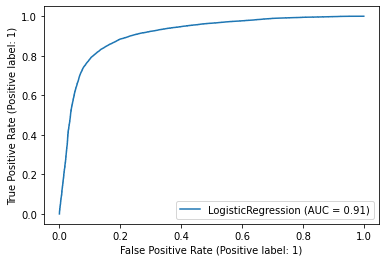

In [185]:
#ROC AUC curve for logistic regression for train data

from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_pca, df_train_pca, y_train_res)
plt.show()  

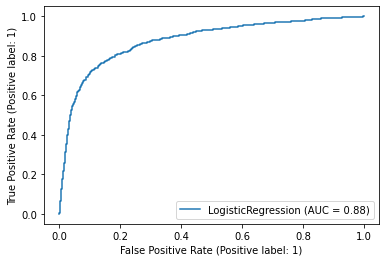

In [186]:
#ROC AUC curve for logistic regression for test data

from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_pca, df_test_pca, y_test)
plt.show()

In [187]:
y_train_pred_final = pd.DataFrame({'Converted':y_train_res, 'Converted_Prob':y_train_pred[:,1]})

y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.511749
1,0,0.351790
2,0,0.100318
3,0,0.105058
4,0,0.153595


In [188]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.511749,1
1,0,0.351790,0
2,0,0.100318,0
3,0,0.105058,0
4,0,0.153595,0


In [189]:
# Confusion matrix 

confusion = confusion_matrix(y_train_res, model_pca.predict(df_train_pca))
print(confusion)

[[15956  3236]
 [ 2680 16512]]


In [190]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [191]:
# Let's see the sensitivity of our logistic regression model

print("sensitivity : " )
print((TP / float(TP+FN)))

sensitivity : 
0.8603584827011255


In [192]:
# Let us calculate specificity
print("Specificity : " )
print((TN / float(TN+FP)))

Specificity : 
0.8313880783659858


In [193]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.511749,1,1,1,1,1,1,1,0,0,0,0
1,0,0.351790,0,1,1,1,1,0,0,0,0,0,0
2,0,0.100318,0,1,1,0,0,0,0,0,0,0,0
3,0,0.105058,0,1,1,0,0,0,0,0,0,0,0
4,0,0.153595,0,1,1,0,0,0,0,0,0,0,0


In [194]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci','recal'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recal = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci,recal]
print(cutoff_df)

     prob  accuracy     sensi     speci     preci     recal
0.0   0.0  0.500000  1.000000  0.000000  0.500000  1.000000
0.1   0.1  0.708316  0.972280  0.444352  0.636339  0.972280
0.2   0.2  0.772796  0.948208  0.597384  0.701948  0.948208
0.3   0.3  0.810781  0.924343  0.697218  0.753259  0.924343
0.4   0.4  0.834645  0.898447  0.770842  0.796775  0.898447
0.5   0.5  0.845873  0.860358  0.831388  0.836135  0.860358
0.6   0.6  0.846420  0.815496  0.877345  0.869259  0.815496
0.7   0.7  0.834254  0.754116  0.914391  0.898052  0.754116
0.8   0.8  0.794081  0.643706  0.944456  0.920566  0.643706
0.9   0.9  0.653528  0.331128  0.975927  0.932228  0.331128


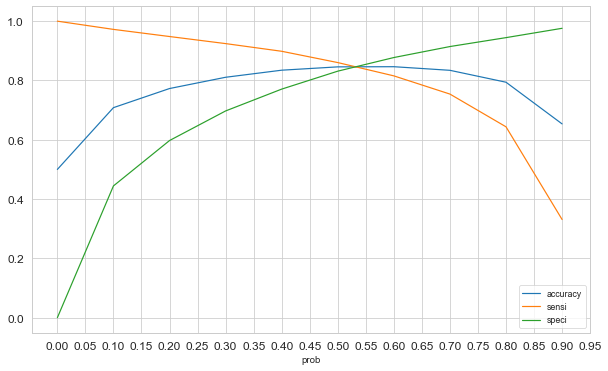

In [195]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") 
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

### Optimal point is around 0.5 cutoff

In [196]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.511749,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.351790,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.100318,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.105058,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.153595,0,1,1,0,0,0,0,0,0,0,0,0


### Random Forest with PCA:

In [201]:
from sklearn.ensemble import RandomForestClassifier

### random forest with initial parameters

In [202]:
rf = RandomForestClassifier(n_estimators=10, max_depth=30, max_features=75, random_state=350, min_samples_leaf= 30,oob_score=True, class_weight='balanced')

In [203]:
%%time
rf.fit(df_train_pca, y_train_res)

Wall time: 20.2 s


RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=75,
                       min_samples_leaf=30, n_estimators=10, oob_score=True,
                       random_state=350)

In [204]:
rf.oob_score_

0.8698155481450605

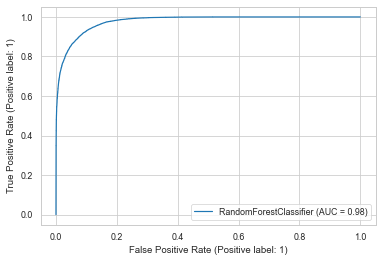

In [205]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, df_train_pca, y_train_res)
plt.show()

In [206]:
evaluate_model(rf)

Train Accuracy : 0.9141829929137141
Train ROC_AUC_Score : 0.9141829929137142
Train Precision Value: 0.9045704397394136
Train Recall Value: 0.926062942892872
Train Confusion Matrix:
[[17317  1875]
 [ 1419 17773]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     19192
           1       0.90      0.93      0.92     19192

    accuracy                           0.91     38384
   macro avg       0.91      0.91      0.91     38384
weighted avg       0.91      0.91      0.91     38384

--------------------------------------------------
Test Accuracy : 0.8621723678365171
Test ROC_AUC_Score : 0.8029532981198869
Test Precision Value: 0.35540287320424735
Test Recall Value: 0.7313624678663239
Test Confusion Matrix:
[[7194 1032]
 [ 209  569]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8226
           1       0.36      0.73      

### Random Forest Model evaluation, without hyperparameter tuning

- Train Accuracy : 0.9145737807419758
- Train ROC_AUC_Score : 0.9145737807419757
- Train Recall Value: 0.9266882034180909
- .................................
- Test Accuracy : 0.8623944913371835
- Test ROC_AUC_Score : 0.8059843170785215
- Test Recall Value: 0.7377892030848329

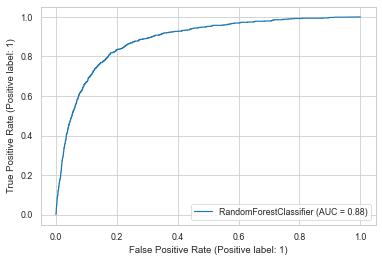

In [207]:
#ROC AUC curve for Random Forest for test data

from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, df_test_pca, y_test)
plt.show()

### Random Forest With HyperParameters

In [208]:
rf_1 = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

In [209]:
params = {
    'max_depth': [20,25, 30, 35, 40],
    'min_samples_leaf': [10,20,30,50],
    'n_estimators': [10,20, 30, 50, 100]
}

In [210]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf_1,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [211]:
%%time
grid_search.fit(df_train_pca, y_train_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 10min 36s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35, 40],
                         'min_samples_leaf': [10, 20, 30, 50],
                         'n_estimators': [10, 20, 30, 50, 100]},
             scoring='roc_auc', verbose=1)

In [212]:
grid_search.best_score_

0.9776676320382565

In [213]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=10, n_jobs=-1, random_state=42)

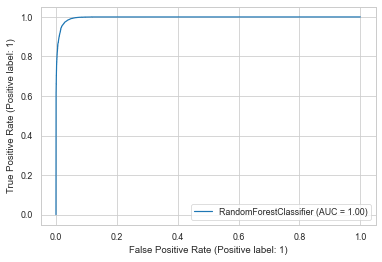

In [214]:
plot_roc_curve(rf_best, df_train_pca, y_train_res)
plt.show()

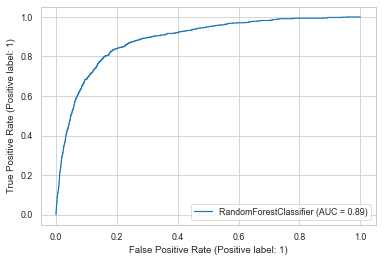

In [215]:
plot_roc_curve(rf_best, df_test_pca, y_test)
plt.show()

In [216]:
evaluate_model(rf_best)

Train Accuracy : 0.9723843268028345
Train ROC_AUC_Score : 0.9723843268028345
Train Precision Value: 0.9654004106776181
Train Recall Value: 0.9798874531054607
Train Confusion Matrix:
[[18518   674]
 [  386 18806]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     19192
           1       0.97      0.98      0.97     19192

    accuracy                           0.97     38384
   macro avg       0.97      0.97      0.97     38384
weighted avg       0.97      0.97      0.97     38384

--------------------------------------------------
Test Accuracy : 0.8991559306974678
Test ROC_AUC_Score : 0.7679143876991695
Test Precision Value: 0.4397031539888683
Test Recall Value: 0.609254498714653
Test Confusion Matrix:
[[7622  604]
 [ 304  474]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8226
           1       0.44      0.61      0

### Random Forest Model evaluation, with hyperparameter tuning

- Train Accuracy : 0.9723843268028345
- Train ROC_AUC_Score : 0.9723843268028345
- Train Recall Value: 0.9798874531054607
- .................................
- Test Accuracy : 0.8991559306974678
- Test ROC_AUC_Score : 0.7679143876991695
- Test Recall Value: 0.609254498714653

### We can reject this model due to low sensitivity/recall on test set.

### XGBoost:

In [217]:
import xgboost as xgb
from sklearn import metrics

xgclf = xgb.XGBClassifier()

xgclf.fit(df_train_pca, y_train_res)

[22:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [218]:
evaluate_model(xgclf)

Train Accuracy : 0.992965819091288
Train ROC_AUC_Score : 0.992965819091288
Train Precision Value: 0.987127999176192
Train Recall Value: 0.9989578991246353
Train Confusion Matrix:
[[18942   250]
 [   20 19172]]
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19192
           1       0.99      1.00      0.99     19192

    accuracy                           0.99     38384
   macro avg       0.99      0.99      0.99     38384
weighted avg       0.99      0.99      0.99     38384

--------------------------------------------------
Test Accuracy : 0.9038205242114615
Test ROC_AUC_Score : 0.759993237318253
Test Precision Value: 0.456
Test Recall Value: 0.5861182519280206
Test Confusion Matrix:
[[7682  544]
 [ 322  456]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8226
           1       0.46      0.59      0.51       778

 

In [219]:
from sklearn.model_selection import GridSearchCV

### XGBoost With HyperParameters

In [220]:
%%time
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train_res)

[22:21:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 1s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [221]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9881770588300295
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [222]:
evaluate_model(clf_xgb)

Train Accuracy : 0.992965819091288
Train ROC_AUC_Score : 0.992965819091288
Train Precision Value: 0.987127999176192
Train Recall Value: 0.9989578991246353
Train Confusion Matrix:
[[18942   250]
 [   20 19172]]
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19192
           1       0.99      1.00      0.99     19192

    accuracy                           0.99     38384
   macro avg       0.99      0.99      0.99     38384
weighted avg       0.99      0.99      0.99     38384

--------------------------------------------------
Test Accuracy : 0.9038205242114615
Test ROC_AUC_Score : 0.759993237318253
Test Precision Value: 0.456
Test Recall Value: 0.5861182519280206
Test Confusion Matrix:
[[7682  544]
 [ 322  456]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8226
           1       0.46      0.59      0.51       778

 

In [223]:
%%time
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.3, 0.4],
              'max_depth': [4, 6],
              'min_child_weight': [1, 10],
              'n_estimators': [100, 200]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train_res)  

[22:35:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 14min 26s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [224]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200}
0.9928945559708884
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [225]:
final_model = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=6,
                                min_child_weight=1,
                                n_estimators=200)

In [226]:
final_model.fit(df_train_pca, y_train_res)

[22:35:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [227]:
evaluate_model(final_model)

Train Accuracy : 0.9999739474781159
Train ROC_AUC_Score : 0.9999739474781159
Train Precision Value: 0.9999478976710259
Train Recall Value: 1.0
Train Confusion Matrix:
[[19191     1]
 [    0 19192]]
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19192
           1       1.00      1.00      1.00     19192

    accuracy                           1.00     38384
   macro avg       1.00      1.00      1.00     38384
weighted avg       1.00      1.00      1.00     38384

--------------------------------------------------
Test Accuracy : 0.9120390937361172
Test ROC_AUC_Score : 0.7435431077210201
Test Precision Value: 0.4918032786885246
Test Recall Value: 0.5398457583547558
Test Confusion Matrix:
[[7792  434]
 [ 358  420]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8226
           1       0.49      0.54      0.51       778


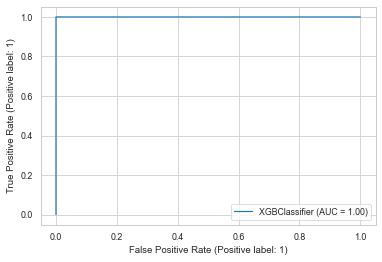

In [237]:
plot_roc_curve(final_model, df_train_pca, y_train_res)
plt.show()

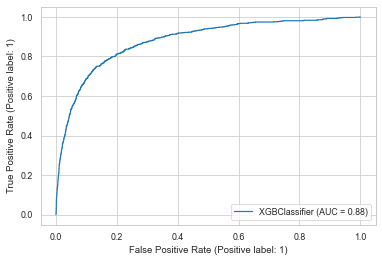

In [238]:
plot_roc_curve(final_model, df_test_pca, y_test)
plt.show()

In [229]:
# Confusion matrix for Train Data

confusion = confusion_matrix(y_train_res, final_model.predict(df_train_pca))
print(confusion)

[[19191     1]
 [    0 19192]]


In [230]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [231]:
# Let's see the sensitivity of our Random Forest model

print("sensitivity : " )
print((TP / float(TP+FN)))

sensitivity : 
1.0


In [232]:
# Let us calculate specificity of our Random Forest model
print("Specificity : " )
print((TN / float(TN+FP)))

Specificity : 
0.9999478949562317


### Test score on XGBoost:

In [233]:
# Confusion matrix for Test Data

confusion = confusion_matrix(y_test, final_model.predict(df_test_pca))
print(confusion)

[[7792  434]
 [ 358  420]]


In [234]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [235]:
# Let's see the sensitivity of our Random Forest model

print("sensitivity : " )
print((TP / float(TP+FN)))

sensitivity : 
0.5398457583547558


In [236]:
# Let us calculate specificity of our Random Forest model
print("Specificity : " )
print((TN / float(TN+FP)))

Specificity : 
0.9472404570872842


### It can be seen that sensitivity for random forest and XGBoost on test data is much lower than logistic regression performance

### Logistic regression can be selected as final model

### Evaluation (Final Model logistic Regression)
- Train Accuracy : 0.8463943309712381
- Train ROC_AUC_Score : 0.8463943309712381
- Train Recall Value: 0.8608274280950396
- ..................................................
- Test Accuracy : 0.8229675699689027
- Test ROC_AUC_Score : 0.810009581507503
- Test Recall Value: 0.80

### Inferences and business insights from model building and EDA:
-- Total incoming minutes of usage is key variable, if there is a drop in incoming MOU then probability of churning is high
 
-- Variables dervied using value for 8th month - average (6th and 7th month), like total_ic_mou_change and total_rech_num_change also have significant impact in predicting churn

-- Behaviour is 8 Month plays a vital role in deciding churn

-- When average revenue per user reduces the churn probability increases

-- Also the company needs to focus on the STD and ISD rates as seen from top features dataframe. Special ISD and STD packs can be offered to prevent churn of customers using ISD and STD services.

-- Telecom company must focus more on new customers as they are more likely to churn.